# –ü—Ä–æ–∏–∑–≤–æ–¥–∏–º –∏–º–ø–æ—Ä—Ç –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫ –∏ —Å—á–∏—Ç—ã–≤–∞–Ω–∏–µ –∏–∑ –Ω–∏—Ö –¥–∞–Ω–Ω—ã—Ö

In [3]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

DATA_PATH = './data/'
df_demo = pd.read_spss(DATA_PATH + 'demo2017.sav')
df_health = pd.read_spss(DATA_PATH + 'health2017.sav')
df_income = pd.read_spss(DATA_PATH + 'income2017.sav')
# –ü—Ä–∏–≤–æ–¥–∏–º –≤—Å—ë –∫ –æ–¥–Ω–æ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
df_demo.columns = df_demo.columns.str.lower()
df_health.columns = df_health.columns.str.lower()
df_income.columns = df_income.columns.str.lower()

def get_stats(df_column : pd.Series):
    """
    Takes pandas Series and returns it's string representation
    """
    col_mean = df_column.mean()
    col_median = df_column.median()
    col_mode = df_column.mode()[0]
    col_std = df_column.std()
    col_skew = df_column.skew()
    col_kurt = df_column.kurt()
    return f"""
            n_obs: {len(df_column)}
            mean: {col_mean:.3f}, median: {col_median:.3f}, mode: {col_mode:.3f}
            std: {col_std:.3f}, skewness: {col_skew:.3f}, kurtosis: {col_kurt:.3f}
            """
            
def standardize(df_column : pd.Series):
    idxs = df_column.index
    return pd.Series(StandardScaler().fit_transform(np.array(df_column).reshape(-1,1))[:,0], idxs)

# 1. –ü–æ–¥–≥–æ—Ç–æ–≤–∏–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è 4 –≤–∞—Ä–∏–∞–Ω—Ç–∞ –∑–∞–¥–∞–Ω–∏–π

## –û–±—ä–µ–¥–∏–Ω–∏–º –¥–∞–Ω–Ω—ã–µ –ø–æ —á–ª–µ–Ω–∞–º –¥–æ–º–æ—Ö–æ–∑—è–π—Å—Ç–≤ –≤ –æ–¥–∏–Ω –¥–∞—Ç–∞—Ñ—Ä–µ–π–º

–î–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Å–¥–µ–ª–∞—Ç—å merge –ø–æ n_uhc –∏ n_upc, —Ç.–∫. –æ–Ω–∏ –∑–∞–¥–∞—é—Ç —É–Ω–∏–∫–∞–ª—å–Ω–æ–≥–æ —á–ª–µ–Ω–∞ –¥–æ–º–∞—à–Ω–µ–≥–æ –¥–æ–º–æ—Ö–æ–∑—è–π—Å—Ç–≤–∞, –Ω–æ —á—Ç–æ–±—ã ['age', 'region', 'resid', 'sex'] –Ω–µ –¥—É–±–ª–∏—Ä–æ–≤–∞–ª–∏—Å—å, —Å–¥–µ–ª–∞–µ–º merge –ø–æ –≤—Å–µ–º –æ–±—â–∏–º –∫–æ–ª–æ–Ω–∫–∞–º. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –º—ã –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–æ–∫–æ–Ω—Ç—Ä–æ–ª–∏—Ä—É–µ–º, —á—Ç–æ –≤—ã–±–∏—Ä–∞–µ–º –¥–æ—Å—Ç–æ–≤–µ—Ä–Ω—ã–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è, —É –∫–æ—Ç–æ—Ä—ã—Ö —Å–æ–≤–ø–∞–¥–∞—é—Ç –Ω–µ —Ç–æ–ª—å–∫–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã–µ –∫–æ–¥—ã, –Ω–æ –∏ ['age', 'region', 'resid', 'sex'] (–∞ –æ–Ω–∏ –¥–æ–ª–∂–Ω—ã —Å–æ–≤–ø–∞–¥–∞—Ç—å –¥–ª—è –æ–±–æ–∏—Ö –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–æ–≤)

–î–ª–∏–Ω–∞ –Ω–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞, —Å–æ–¥–µ—Ä–∂–∞—â–µ–≥–æ –¥–∞–Ω–Ω—ã–µ –ø–æ –≤—Å–µ–º —á–ª–µ–Ω–∞–º –¥–æ–º–æ—Ö–æ–∑—è–π—Å—Ç–≤ –Ω–∞ –æ–¥–Ω—É —Å—Ç—Ä–æ–∫—É –º–µ–Ω—å—à–µ, —á–µ–º —Ä–∞–∑–º–µ—Ä df_health (—Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ –∫–∞–∫–æ–π-—Ç–æ –∏–∑ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤—Å—ë-—Ç–∞–∫–∏ –Ω–µ —Å–æ–≤–ø–∞–¥–∞–ª –≤ df_demo –∏ df_health –∏–ª–∏ –æ –∫–∞–∫–æ–º-—Ç–æ —á–ª–µ–Ω–µ –¥–æ–º–æ—Ö–æ–∑—è–π—Å—Ç–≤–∞ –Ω–µ –±—ã–ª–æ –¥–∞–Ω–Ω—ã—Ö –≤ df_demo)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ df_person —Ä–∞–≤–Ω–æ 16 (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ df_demo (11) + –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ df_health (11) - —Ä–∞–∑–º–µ—Ä –∏—Ö –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è (6) )

In [4]:
print("–û–±—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã –≤ demo –∏ health –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞—Ö", np.intersect1d(df_demo.columns, df_health.columns))
print("–û–±—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã –≤ demo –∏ income –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞—Ö", np.intersect1d(df_demo.columns, df_income.columns))
print("–û–±—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã –≤ health –∏ income –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞—Ö", np.intersect1d(df_health.columns, df_income.columns))

df_person = df_demo.merge(df_health, on=np.intersect1d(df_demo.columns, df_health.columns).tolist())
print(df_person.shape)
df_person.head()

–û–±—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã –≤ demo –∏ health –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞—Ö ['age' 'n_uhc' 'n_upc' 'region' 'resid' 'sex']
–û–±—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã –≤ demo –∏ income –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞—Ö ['n_uhc' 'region' 'resid' 'year' 'yweight']
–û–±—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã –≤ health –∏ income –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞—Ö ['n_uhc' 'region' 'resid']
(11111, 16)


n_uhc  n_upc    year     yweight       resid        region   age     sex  \
0    1.0    1.0  2017.0  504.560908  Large city  Brest oblast  66.0  Female   
1    2.0    1.0  2017.0  463.977546  Large city  Brest oblast  61.0    Male   
2    2.0    2.0  2017.0  463.977546  Large city  Brest oblast  60.0  Female   
3    3.0    1.0  2017.0  504.560908  Large city  Brest oblast  38.0  Female   
4    3.0    2.0  2017.0  504.560908  Large city  Brest oblast  63.0  Female   

   ppinc_1  nummonth                                    educat  \
0      0.0       0.0  Higher education, After Higher education   
1      0.0       0.0           Secondary specialized education   
2      0.0       0.0           Secondary specialized education   
3      0.0       0.0           Secondary specialized education   
4      0.0       0.0           Secondary specialized education   

                     healthev weight height              sport smoker  
0                         Bad   62.0  165.0  Yes, in free time     No  
1  Not very good, but not bad   73.0  165.0  Yes, in free time     No  
2  Not very good, but not bad   76.0  163.0  Yes, in free time     No  
3  Not very good, but not bad   83.0  160.0  Yes, in free time     No  
4                         Bad   73.0  163.0                 No     No

## –û–±—ä–µ–¥–∏–Ω–∏–º –¥–∞–Ω–Ω—ã–µ –ø–æ —á–ª–µ–Ω–∞–º –¥–æ–º–æ—Ö–æ–∑—è–π—Å—Ç–≤ —Å –¥–∞–Ω–Ω—ã–º–∏ –ø–æ –∏—Ö –¥–æ–º–æ—Ö–æ–∑—è–π—Å—Ç–≤–∞–º

–î–ª—è —ç—Ç–æ–≥–æ —Å–¥–µ–ª–∞–µ–º merge –ø–æ –ø–æ –æ–±—â–∏–º –∫–æ–ª–æ–Ω–∫–∞–º –≤ df_person –∏ df_income (–∫–∞–∫ –∏ –≤ –ø—Ä–æ—à–ª–æ–º —Å–ª—É—á–∞–µ, –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ —Ç–æ–ª—å–∫–æ –∫–æ–¥–∞ –¥–æ–º–æ—Ö–æ–∑—è–π—Å—Ç–≤–∞ n_uhc, –Ω–æ –¥–ª—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–π –ø—Ä–æ–≤–µ—Ä–∫–∏ –¥–æ—Å—Ç–æ–≤–µ—Ä–Ω–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö –∏ –≤–æ –∏–∑–±–µ–∂–∞–Ω–∏–µ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ –∫–æ–ª–æ–Ω–æ–∫ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ —Å–¥–µ–ª–∞–µ–º –ø–æ –≤—Å–µ–º –æ–±—â–∏–º –∫–æ–ª–æ–Ω–∫–∞–º)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ —Å–æ—Ö—Ä–∞–Ω–∏–ª–æ—Å—å, –∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å—Ç–∞–ª–æ —Ä–∞–≤–Ω–æ 72 (–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ df_income (61) + –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ df_person (16) - —Ä–∞–∑–º–µ—Ä –∏—Ö –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è (5) )

In [5]:
print("–û–±—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã –≤ person –∏ income –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞—Ö", np.intersect1d(df_person.columns, df_income.columns))
full_df = df_person.merge(df_income, on=np.intersect1d(df_person.columns, df_income.columns).tolist())
print("–ü–æ–ª–Ω—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º:", full_df.shape)
full_df.head()

–û–±—â–∏–µ —Å—Ç–æ–ª–±—Ü—ã –≤ person –∏ income –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞—Ö ['n_uhc' 'region' 'resid' 'year' 'yweight']
–ü–æ–ª–Ω—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º: (11111, 72)


n_uhc  n_upc    year     yweight       resid        region   age     sex  \
0    1.0    1.0  2017.0  504.560908  Large city  Brest oblast  66.0  Female   
1    2.0    1.0  2017.0  463.977546  Large city  Brest oblast  61.0    Male   
2    2.0    2.0  2017.0  463.977546  Large city  Brest oblast  60.0  Female   
3    3.0    1.0  2017.0  504.560908  Large city  Brest oblast  38.0  Female   
4    3.0    2.0  2017.0  504.560908  Large city  Brest oblast  63.0  Female   

   ppinc_1  nummonth                                    educat  \
0      0.0       0.0  Higher education, After Higher education   
1      0.0       0.0           Secondary specialized education   
2      0.0       0.0           Secondary specialized education   
3      0.0       0.0           Secondary specialized education   
4      0.0       0.0           Secondary specialized education   

                     healthev weight height              sport smoker  \
0                         Bad   62.0  165.0  Yes, in free time     No   
1  Not very good, but not bad   73.0  165.0  Yes, in free time     No   
2  Not very good, but not bad   76.0  163.0  Yes, in free time     No   
3  Not very good, but not bad   83.0  160.0  Yes, in free time     No   
4                         Bad   73.0  163.0                 No     No   

                          htype  hsize  ch0_5  ch6_12  ch13_17  elder  inc_1  \
0  Lone adult older working age    1.0    0.0     0.0      0.0    1.0    0.0   
1  All adults older working age    2.0    0.0     0.0      0.0    2.0    0.0   
2  All adults older working age    2.0    0.0     0.0      0.0    2.0    0.0   
3    Lone person (no pensioner)    1.0    0.0     0.0      0.0    0.0    0.0   
4    Lone person (no pensioner)    1.0    0.0     0.0      0.0    0.0    0.0   

   inc_2  inc_3       inc_4  inc_5   inc_6  inc_7       inc_8  inc_9  inc_10  \
0    0.0    0.0  321.471667    0.0   0.000    0.0   12.500000    0.0     0.0   
1    0.0    0.0  729.666667    0.0   0.000    0.0    4.166667    0.0     0.0   
2    0.0    0.0  729.666667    0.0   0.000    0.0    4.166667    0.0     0.0   
3    0.0    0.0  100.100000    0.0  68.275    0.0  200.000000    0.0     0.0   
4    0.0    0.0  100.100000    0.0  68.275    0.0  200.000000    0.0     0.0   

      inc_11     cashinc     inkind     privlg    totalinc       exp_1  \
0   0.000000  333.971667   0.000000   0.000000  333.971667  184.456667   
1   0.000000  733.833333  42.437329  66.760833  843.031496  419.575417   
2   0.000000  733.833333  42.437329  66.760833  843.031496  419.575417   
3  33.366667  401.741667  16.448662  50.312500  468.502828  154.219167   
4  33.366667  401.741667  16.448662  50.312500  468.502828  154.219167   

      exp_2      exp_3  exp_4  exp_5      exp_6  exp_6_1    exp_6_2  \
0  0.000000  16.123333   0.00    0.0  15.879167      0.0   0.000000   
1  2.952083   7.816667   0.00    0.0  53.674167      0.0  53.674167   
2  2.952083   7.816667   0.00    0.0  53.674167      0.0  53.674167   
3  1.056250   6.620000   1.25    0.0  41.110833      0.0  41.110833   
4  1.056250   6.620000   1.25    0.0  41.110833      0.0  41.110833   

       exp_7  exp_8      exp_9     exp_10    exp_11  exp_12     exp_13  \
0  40.181667    0.0  56.729167  11.291667  0.000000     0.0   0.416667   
1   6.108333    0.0  22.750000  18.944167  1.033333     0.0  26.704167   
2   6.108333    0.0  22.750000  18.944167  1.033333     0.0  26.704167   
3   4.236667    0.0   6.974167  11.025000  2.500000     0.0  31.880000   
4   4.236667    0.0   6.974167  11.025000  2.500000     0.0  31.880000   

      exp_14  exp_15  exp_16     exp_17   exp_17_1     exp_18     exp_19  \
0  11.173333     0.0     0.0   2.935833   2.935833  13.885000   1.666667   
1  14.705833     0.0     0.0   0.000000   0.000000  18.061667  13.333333   
2  14.705833     0.0     0.0   0.000000   0.000000  18.061667  13.333333   
3  14.930833     0.0     0.0  26.616667  26.616667   5.169167  59.354167   
4  14.930833     0.0     0.0  26.

## –í—ã–±–µ—Ä–µ–º —Å –ø–æ–º–æ—â—å—é —Å–ª—É—á–∞–π–Ω–æ–≥–æ –≤—ã–±–æ—Ä–∞ (–±–µ–∑ –ø–æ–≤—Ç–æ—Ä–µ–Ω–∏–π) –ø–æ–¥–≤—ã–±–æ—Ä–∫—É –≤ 2000 —á–µ–ª–æ–≤–µ–∫

In [6]:
np.random.seed(20001109)
idxs = np.random.choice(full_df.index, 2000, replace=False)
df = full_df.iloc[idxs].copy()
df.head()

n_uhc  n_upc    year      yweight       resid          region   age  \
9460   5251.0    1.0  2017.0   535.998033       Rural    Minsk oblast  42.0   
5545   3031.0    1.0  2017.0   544.369792  Small city   Grodno oblast  73.0   
297     162.0    1.0  2017.0   463.977546  Large city    Brest oblast  56.0   
6638   3640.0    3.0  2017.0  2056.181878  Minsk city      Minsk city  23.0   
10072  5581.0    5.0  2017.0  3008.156165  Large city  Mogilev oblast  73.0   

          sex     ppinc_1  nummonth                                    educat  \
9460     Male  759.468333      12.0                       Secondary education   
5545   Female    0.000000       0.0  Higher education, After Higher education   
297      Male  396.034167      12.0                       Secondary education   
6638     Male  795.587500      12.0  Higher education, After Higher education   
10072  Female    0.000000       0.0                         Vocational school   

                         healthev weight height              sport smoker  \
9460                         Good   83.0  178.0                 No    Yes   
5545                          Bad   70.0  168.0                 No     No   
297    Not very good, but not bad   83.0  164.0                 No     No   
6638                         Good   75.0  181.0  Yes, in free time     No   
10072  Not very good, but not bad  110.0  165.0                 No     No   

                                 htype  hsize  ch0_5  ch6_12  ch13_17  elder  \
9460   2 and more adults with children    3.0    1.0     0.0      0.0    0.0   
5545      Lone adult older working age    1.0    0.0     0.0      0.0    1.0   
297         Household without children    2.0    0.0     0.0      0.0    1.0   
6638        Household without children    3.0    0.0     0.0      0.0    1.0   
10072  2 and more adults with children    5.0    1.0     1.0      0.0    1.0   

             inc_1     inc_2  inc_3       inc_4       inc_5      inc_6  inc_7  \
9460    791.135000  3.250000  0.000    0.000000  268.578333   0.000000    0.0   
5545      0.000000  0.000000  0.000  416.653333    0.000000  59.708333    0.0   
297     627.658333  0.000000  5.655  326.636667    0.000000   0.000000    0.0   
6638   1646.670833  0.000000  0.000  317.960000    0.000000   0.000000    0.0   
10072   869.436667  3.833333  0.000  317.911667   89.593333   0.000000    0.0   

           inc_8     inc_9  inc_10  inc_11      cashinc     inkind     privlg  \
9460   18.621667  6.916667     0.0     0.0  1088.501667  57.516407   0.000000   
5545   58.333333  0.000000     0.0     0.0   534.695000  30.134244   5.556667   
297    25.000000  0.000000     0.0     0.0   984.950000   0.000000   1.183333   
6638    0.000000  0.000000     0.0     0.0  1964.630833  15.771167  52.630833   
10072  45.833333  0.000000     0.0     0.0  1326.608333  93.067562  24.137500   

          totalinc       exp_1      exp_2      exp_3      exp_4     exp_5  \
9460   1146.018074  374.127917  41.539583  15.251667   6.382500  0.000000   
5545    570.385910  248.321667   3.656250  15.914167  12.666667  0.000000   
297     986.133333  332.752500   0.000000  18.015833  12.509167  0.000000   
6638   2033.032833  399.434583  52.211250  54.430833  64.367500  1.943333   
10072  1443.813395  514.836250  68.897917  42.862500  22.541667  0.000000   

            exp_6  exp_6_1     exp_6_2      exp_7       exp_8      exp_9  \
9460    53.702500      0.0   53.702500  18.576667  135.416667  11.240000   
5545    41.196667      0.0   26.853333  32.473333    0.000000  18.674167   
297     43.336667      0.0   42.525833  28.556667    0.000000  35.863333   
6638    57.534167      0.0   52.117500  46.004167    5.550000  21.086667   
10072  126.276667      0.0  122.186667  32.430000   11.930000  57.556667   

          exp_10      exp_11  exp_12     exp_13      exp_14    exp_15  \
9460    0.491667    0.000000     0.0  37.480833    9.710833  0.000000   
5545    2.166667    0.000000     0.0  10.165000   25.096667  0

## –ü–æ–¥–≥–æ—Ç–æ–≤–∏–º –≤–∑–≤–µ—à–µ–Ω–Ω—ã–π –≤–∞—Ä–∏–∞–Ω—Ç –≤—ã–±–æ—Ä–∫–∏

1. –û–∫—Ä—É–≥–ª–∏–º –≤–µ—Å –≤—ã–±–æ—Ä–∫–∏ (yweight) –¥–æ —Ü–µ–ª–æ–≥–æ —á–∏—Å–ª–∞
2. "–ü–æ–≤—Ç–æ—Ä–∏–º" –∫–∞–∂–¥—É—é –∑–∞–ø–∏—Å—å yweight —Ä–∞–∑ —Å –ø–æ–º–æ—â—å—é df.loc[df.index.repeat(df["yweight"])]
3. –ü—Ä–æ–≤–µ—Ä–∏–º, —Ä–∞–≤–Ω–∞ –ª–∏ —Å—É–º–º–∞ –≤—Å–µ—Ö yweight –≤ –∏—Å—Ö–æ–¥–Ω–æ–º –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —Å—Ç—Ä–æ–∫ –≤–∑–≤–µ—à–µ–Ω–Ω–æ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞

In [7]:
df["yweight"] = df["yweight"].astype(int)
df["weight"] = df["weight"].astype(float)
df["height"] = df["height"].astype(float)

for col in df.columns[df.dtypes == 'category']:
    df[col] = df[col].astype(str)

df = df.replace({"nan" : pd.NA, "DKR" : pd.NA, "Not in Universe" : pd.NA})

df["bmi"] = df["weight"]/((df["height"]/100)**2)
df["savings"] = df["totalinc"]-df["totalexp"]

weighted_df = df.loc[df.index.repeat(df["yweight"])].copy()

print("–†–∞–∑–º–µ—Ä –≤–∑–≤–µ—à–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏:", weighted_df.shape)

is_weighted_correctly = df["yweight"].sum() == len(weighted_df)
print("–í–∑–≤–µ—à–µ–Ω–æ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ?", is_weighted_correctly)

# Uncomment following block for data saving
if is_weighted_correctly:
    df.to_csv(DATA_PATH + "df.csv")
    weighted_df.to_csv(DATA_PATH + "weighted_df.csv")
    print("Data saving completed.")

–†–∞–∑–º–µ—Ä –≤–∑–≤–µ—à–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏: (1282939, 74)
–í–∑–≤–µ—à–µ–Ω–æ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ? True
Data saving completed.


# 2. –ü—Ä–æ–≤–µ–¥—ë–º –∞–Ω–∞–ª–∏–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

–¢–∞–∫ –∫–∞–∫ –º–æ–π –≤–∞—Ä–∏–∞–Ω—Ç - 7, —Ç–æ –∫—Ä–æ–º–µ –æ–±—â–∏—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö —è –∏—Å–ø–æ–ª—å–∑—É—é inc_4 (–ø–µ–Ω—Å–∏–∏) –∏ exp_4 (—Ä–∞—Å—Ö–æ–¥—ã –Ω–∞ –æ–±—É–≤—å) –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞

–ü–µ—Ä–µ–º–µ–Ω–Ω–∞—è totalinc –∏–º–µ–µ—Ç –ª–æ–≥-–Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –æ—Å–Ω–æ–≤–Ω—ã–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è —Å–∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–Ω—ã –æ—Ç 0 –¥–æ 2200.

Text(0.5, 0, 'totalexp')

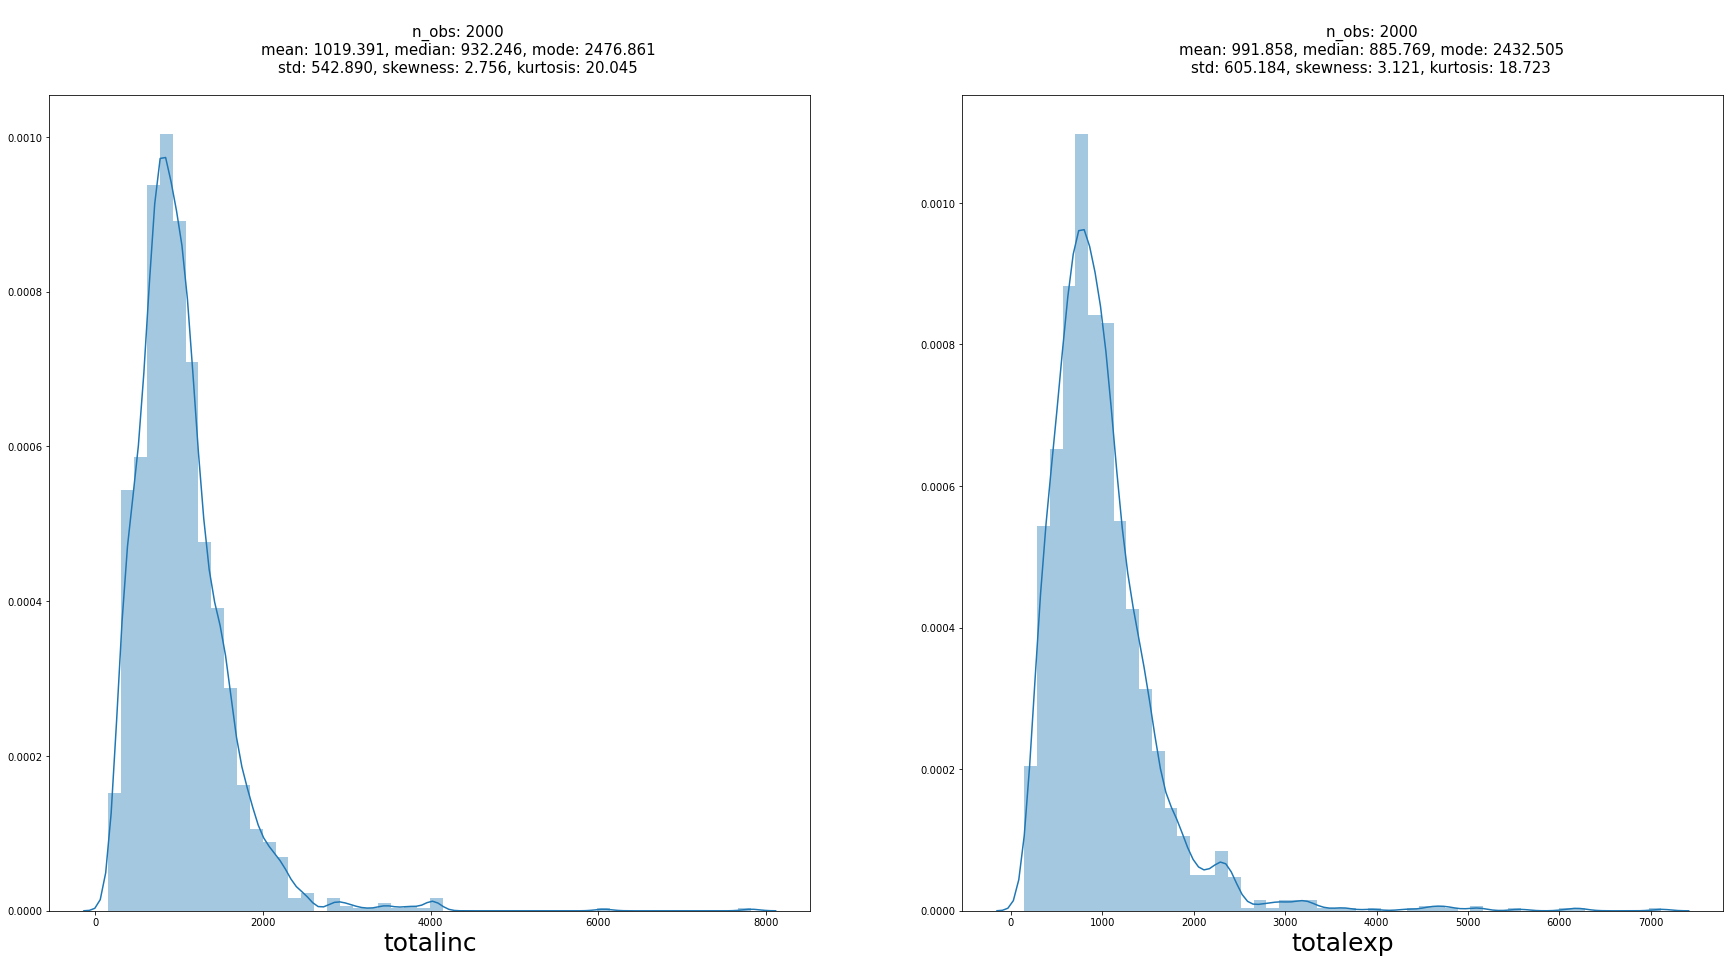

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(30, 15))

sns.distplot(df["totalinc"], ax=axes[0]).set_title(
    get_stats(df["totalinc"]), fontsize=15)
axes[0].set_xlabel("totalinc", fontsize=25)

sns.distplot(df["totalexp"], ax=axes[1]).set_title(
    get_stats(df["totalexp"]), fontsize=15)
axes[1].set_xlabel("totalexp", fontsize=25)

–†–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—è —Å—Ç–∞—Ç—å–∏ inc_4 (–ø–µ–Ω—Å–∏–∏) –∏ exp_4 (—Ä–∞—Å—Ö–æ–¥—ã –Ω–∞ –æ–±—É–≤—å) –º–æ–∂–Ω–æ —É–≤–∏–¥–µ—Ç—å, —á—Ç–æ:
1. –í inc_4 –≤–∏–¥–∏–º, —á—Ç–æ —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –¥–ª—è –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π —Ä–∞–≤–µ–Ω 0, –æ—Å—Ç–∞–≤—à–∏–µ—Å—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—è—é—Ç—Å—è —Å 150 –¥–æ 1600. –î–æ–ª—è —ç—Ç–æ–π –≥—Ä–∞—Ñ—ã –≤–æ –≤—Å–µ—Ö –¥–æ—Ö–æ–¥–∞—Ö –≤ —Å—Ä–µ–¥–Ω–µ–º —Ä–∞–≤–Ω–∞ 4%.
2. –í exp_4 –¥–ª—è –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –ª–µ–∂–∏—Ç –≤ –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ 0-50, –∞ –¥–ª—è –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π —Å–∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∏—Ä–æ–≤–∞–Ω–æ –¥–æ 160.

Text(0.5, 0, 'exp_4 —á–∞—Å—Ç—å –≤ totalexp [–≥–¥–µ exp_4 != 0]')

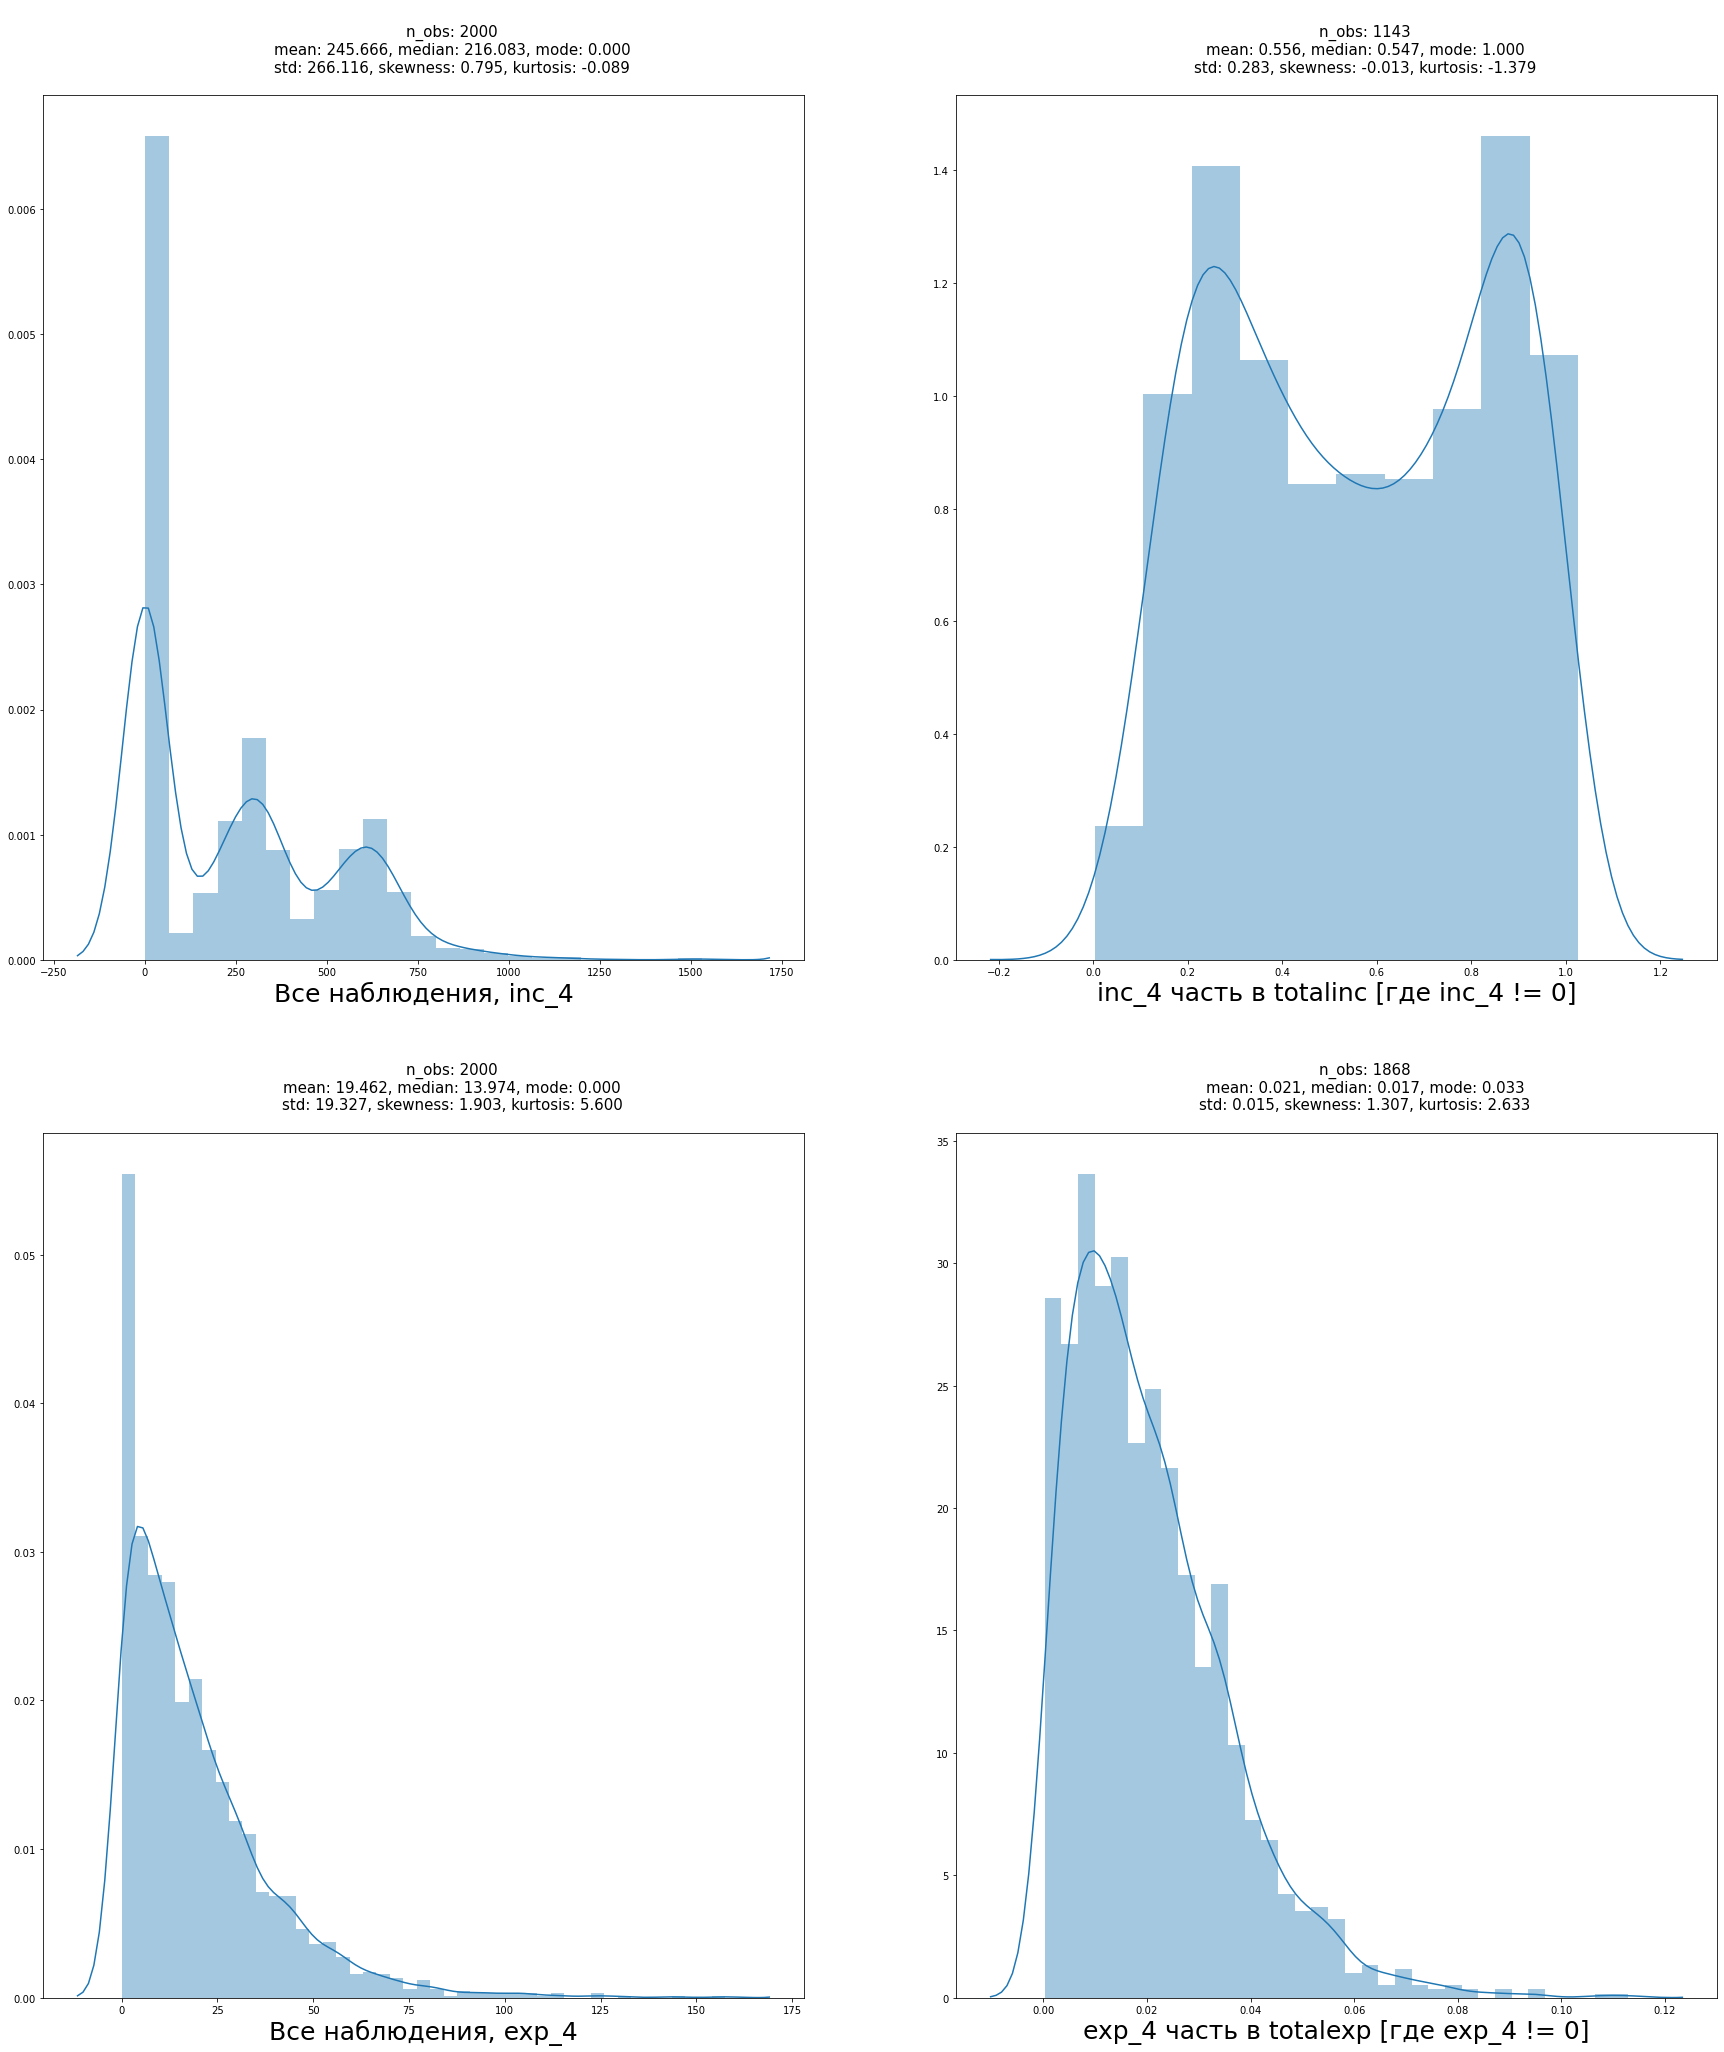

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(30, 35))

sns.distplot(df["inc_4"], ax=axes[0][0]).set_title(
    get_stats(df["inc_4"]), fontsize=15)
axes[0][0].set_xlabel("–í—Å–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è, inc_4", fontsize=25)
    
nonzero_inc4_fraction = df[df["inc_4"] != 0]["inc_4"]/df[df["inc_4"] != 0]["totalinc"]
sns.distplot(nonzero_inc4_fraction, ax=axes[0][1]).set_title(
    get_stats(nonzero_inc4_fraction), fontsize=15)
axes[0][1].set_xlabel(f"inc_4 —á–∞—Å—Ç—å –≤ totalinc [–≥–¥–µ inc_4 != 0]", fontsize=25)

sns.distplot(df["exp_4"], ax=axes[1][0]).set_title(
    get_stats(df["exp_4"]), fontsize=15)
axes[1][0].set_xlabel("–í—Å–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è, exp_4", fontsize=25)

nonzero_exp4_fraction = df[df["exp_4"] != 0]["exp_4"]/df[df["exp_4"] != 0]["totalexp"]
sns.distplot(nonzero_exp4_fraction, ax=axes[1][1]).set_title(
    get_stats(nonzero_exp4_fraction), fontsize=15)
axes[1][1].set_xlabel(f"exp_4 —á–∞—Å—Ç—å –≤ totalexp [–≥–¥–µ exp_4 != 0]", fontsize=25)

####    –í–æ–∑—Ä–∞—Å—Ç (age) –∏–º–µ–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –ø–æ—Ö–æ–∂–µ–µ –Ω–∞ —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ (–æ—Ç 30 –¥–æ 70 –ª–µ—Ç), —á—É—Ç—å –º–µ–Ω—å—à–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –¥–æ 30 –ª–µ—Ç (–≤–µ—Ä–æ—è—Ç–Ω–æ, —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—å—é –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è –æ–ø—Ä–æ—Å–∞) –∏ –ø–æ—Å–ª–µ 70 –ª–µ—Ç (–≤–µ—Ä–æ—è—Ç–Ω–æ, —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ —ç—Ç–∞ –≤–æ–∑—Ä–∞—Å—Ç–Ω–∞—è –≥—Ä—É–ø–ø–∞ –º–µ–Ω—å—à–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∞ –≤ –Ω–∞—à–µ–π —Å—Ç—Ä–∞–Ω–µ)
####    –í–µ—Å (weight) –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å —Ü–µ–Ω—Ç—Ä–æ–º –≤ 77 –∫–≥ (—Ä–µ–¥–∫–æ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è "–≤—ã–±—Ä–æ—Å—ã" –±–æ–ª—å—à–µ 120 –∫–≥)
####    –†–æ—Å—Ç(height) –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å —Ü–µ–Ω—Ç—Ä–æ–º –≤ 168 —Å–º (–±–µ–∑ –≤—ã–±—Ä–æ—Å–æ–≤ –∫–∞–∫ –¥–ª—è –≤–µ—Å–∞, —á—Ç–æ –ª–æ–≥–∏—á–Ω–æ)
####    –ò–Ω–¥–µ–∫—Å –º–∞—Å—Å—ã —Ç–µ–ª–∞ (BMI) —Ç–∞–∫–∂–µ –ø–æ—á—Ç–∏ –∏–º–µ–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å —Ü–µ–Ω—Ç—Ä–æ–º –≤ 26 (–Ω–æ –∏–∑-–∑–∞ "–≤—ã–±—Ä–æ—Å–æ–≤" —Å –ò–ú–¢ > 40 –ø–æ—è–≤–ª—è–µ—Ç—Å—è –Ω–µ–±–æ–ª—å—à–æ–µ —Å–º–µ—â–µ–Ω–∏–µ)

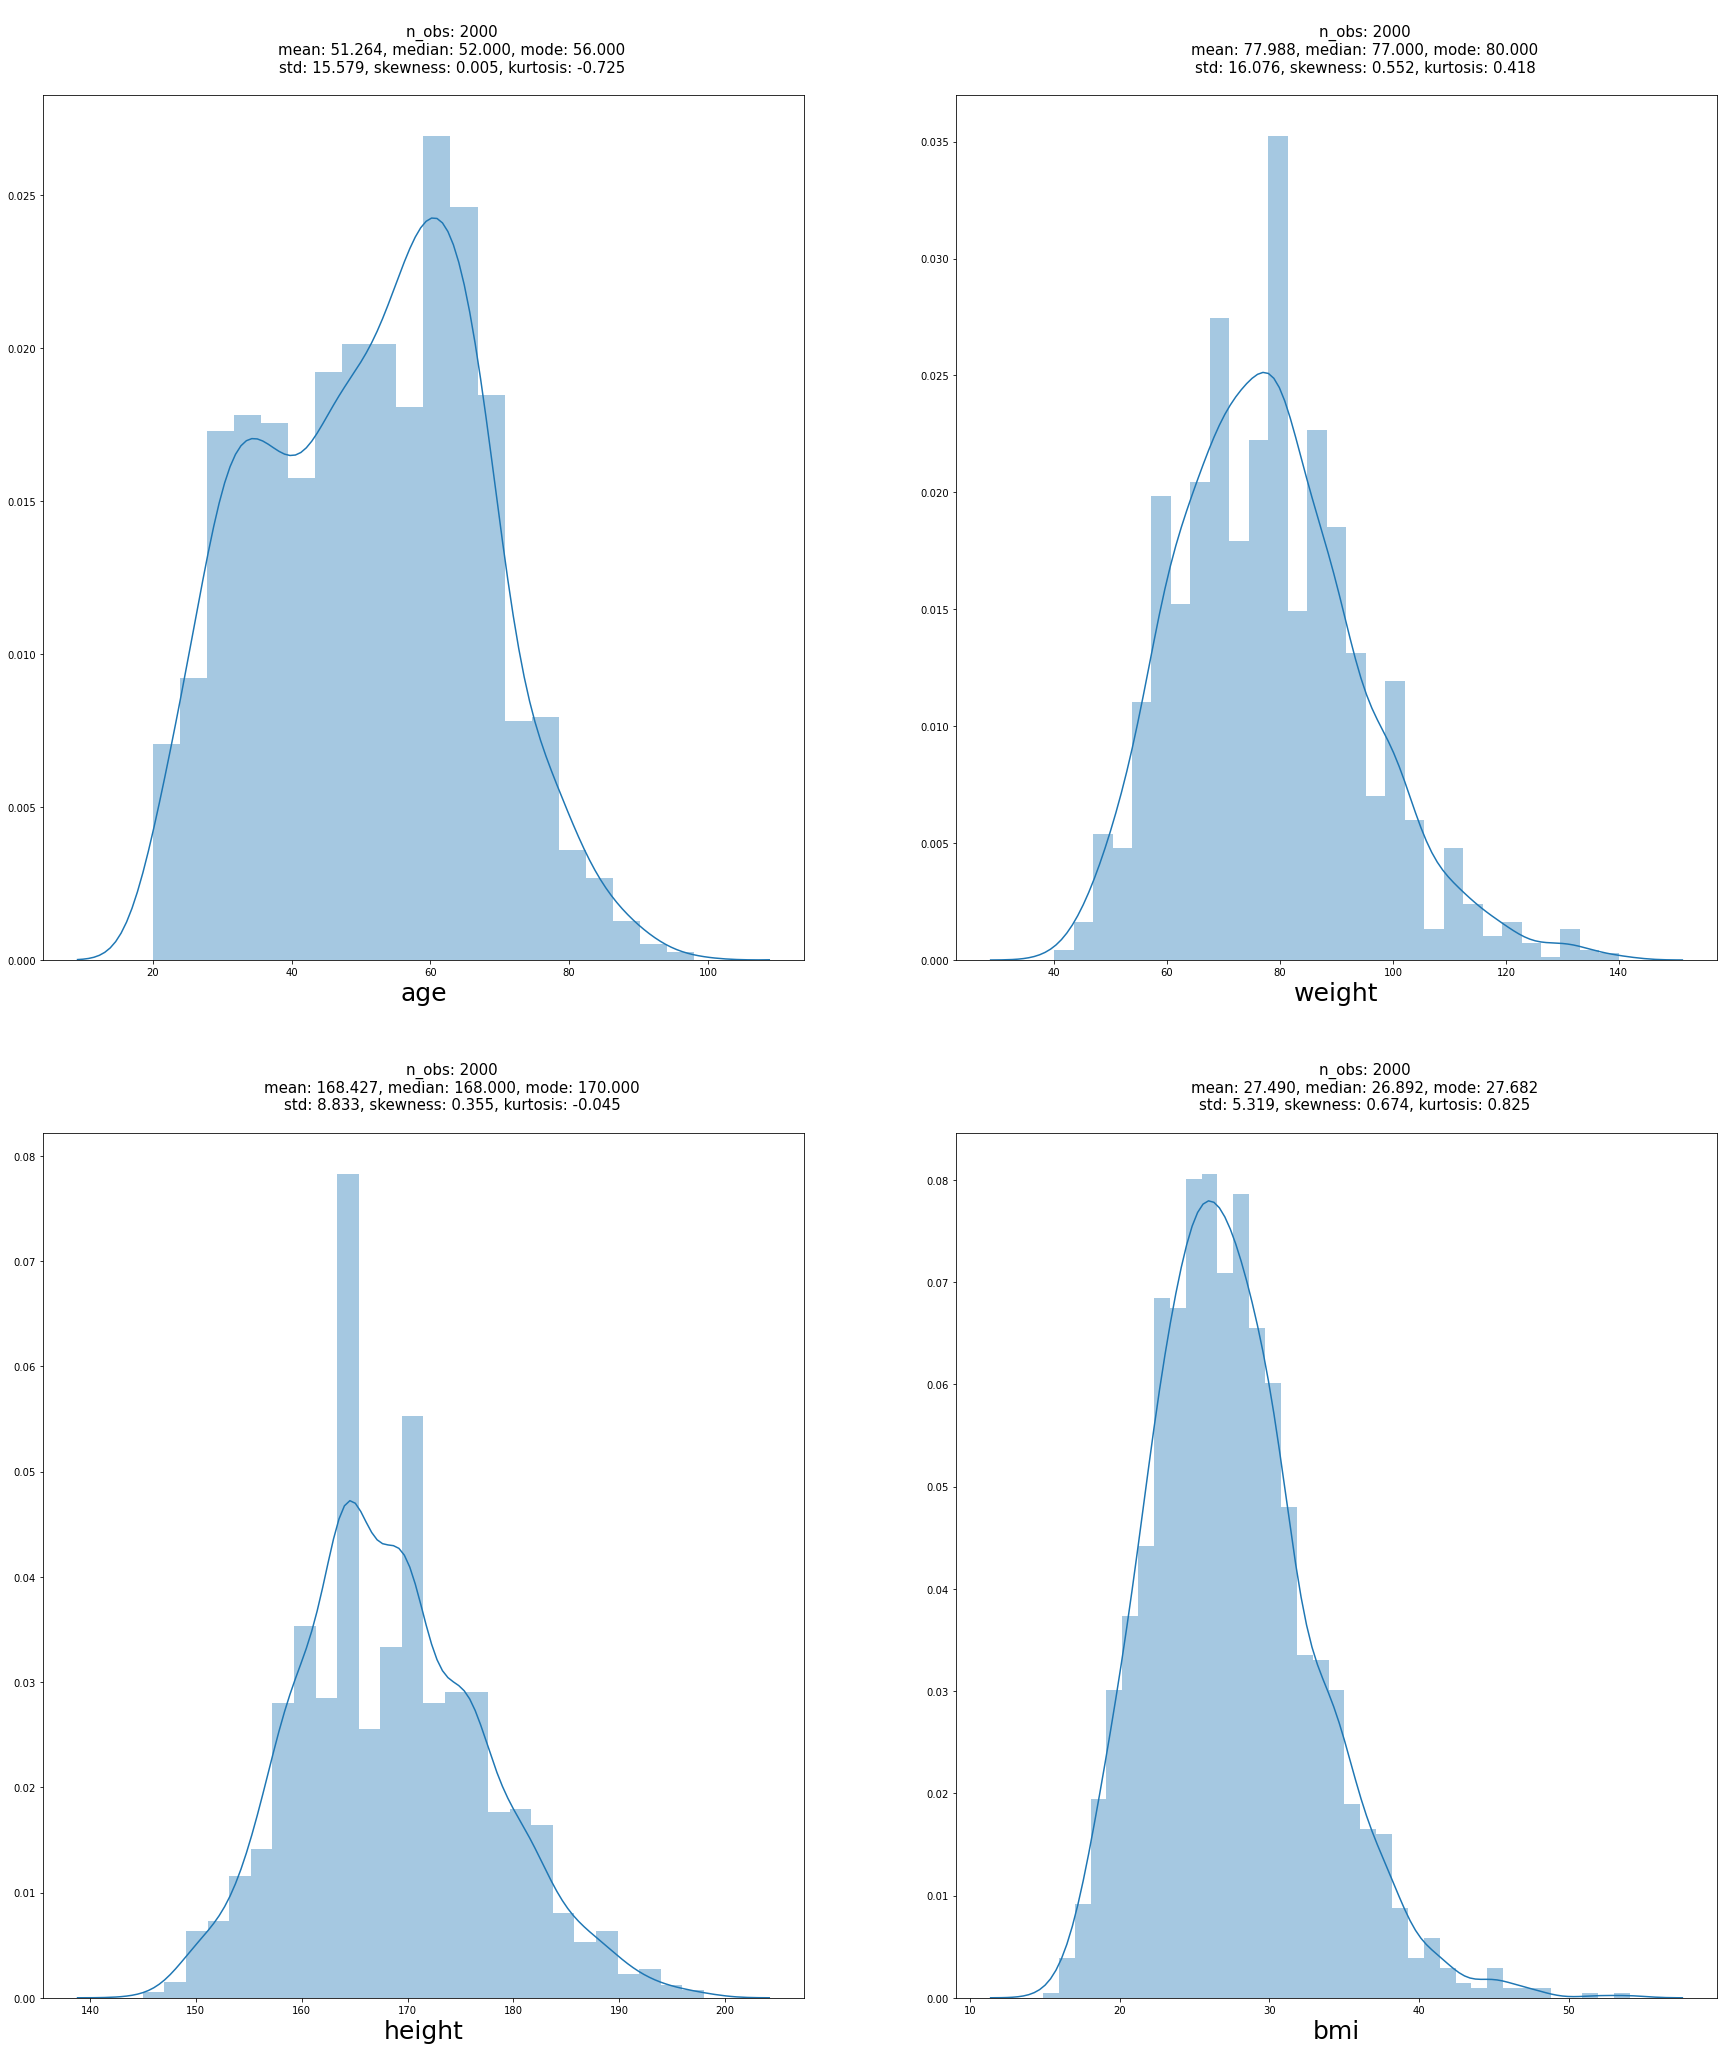

In [10]:
cols_to_plot = ["age", "weight", "height", "bmi"]
fig, axes = plt.subplots(2, 2, figsize=(30, 35))
axes = axes.reshape(-1)

for i in range(len(cols_to_plot)):
    col = cols_to_plot[i]
    sns.distplot(df[col], ax=axes[i]).set_title(get_stats(df[col]), fontsize=15)
    axes[i].set_xlabel(col, fontsize=25)

üîò –ñ–µ–Ω—â–∏–Ω –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –±–æ–ª—å—à–µ, —á–µ–º –º—É–∂—á–∏–Ω: 1200 v 800

üîò –†–µ–≥–∏–æ–Ω—ã –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ. –ú–µ–Ω—å—à–µ –≤—Å–µ–≥–æ - –≤ –ì—Ä–æ–¥–Ω–µ–Ω—Å–∫–æ–π –æ–±–ª–∞—Å—Ç–∏ (12.15%), –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ - –≤ –ì–æ–º–µ–ª—å—Å–∫–æ–π (16.30%). –í –ú–∏–Ω—Å–∫–µ –∂–∏–≤–µ—Ç 2 –º–ª–Ω —á–µ–ª–æ–≤–µ–∫ (–±–æ–ª—å—à–µ 20% –Ω–∞—Å–µ–ª–µ–Ω–∏—è —Å—Ç—Ä–∞–Ω—ã), –∞ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –µ–≥–æ 13.75%. –•–æ—Ç—è –Ω–∞ –≤–∑–≤–µ—à–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ —Å–∏—Ç—É–∞—Ü–∏—è –º–µ–Ω—è–µ—Ç—Å—è –∏ –ú–∏–Ω—Å–∫ –≤ –Ω–µ–π –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ

üîò –ü–æ —Ç–∏–ø–∞–º –¥–æ–º–æ—Ö–æ–∑—è–π—Å—Ç–≤ –¥–æ–º–∏–Ω–∏—Ä—É—é—Ç "2 –∏ –±–æ–ª–µ–µ –≤–∑—Ä–æ—Å–ª—ã—Ö —Å –¥–µ—Ç—å–º–∏" –∏ "–¥–æ–º–æ—Ö–æ–∑—è–π—Å—Ç–≤–æ –±–µ–∑ –¥–µ—Ç–µ–π", –º–µ–Ω—å—à–µ –≤—Å–µ–≥–æ —Å–µ–º–µ–π —Å –æ–¥–Ω–∏–º —Ä–æ–¥–∏—Ç–µ–ª–µ–º

üîò –°–∞–º—ã–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—ë–Ω–Ω—ã–µ –¥–æ–º–æ—Ö–æ–∑—è–π—Å—Ç–≤–∞ - –∏–∑ –¥–≤—É—Ö (–¥–ª—è –Ω–µ–≤–∑–≤–µ—à–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏) –∏ –¥–≤—É—Ö-—Ç—Ä—ë—Ö —á–µ–ª–æ–≤–µ–∫ (–¥–ª—è –≤–∑–≤–µ—à–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏)

üîò –°–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è - —Å—Ä–µ–¥–Ω–µ-—Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ–µ, –º–µ–Ω—å—à–µ –≤—Å–µ–≥–æ –ø–æ —É—Ä–æ–≤–Ω—é –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –ª—é–¥–µ–π –±–µ–∑ –Ω–µ–≥–æ –≤–æ–≤—Å–µ

üîò –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç —Å–≤–æ—ë –∑–¥–æ—Ä–æ–≤—å–µ –∫–∞–∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ (–Ω–µ –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–µ–µ, –Ω–µ –æ—á–µ–Ω—å –ø–ª–æ—Ö–æ–µ). –õ—é–¥–µ–π, —Å—á–∏—Ç–∞—é—â–∏–π, —á—Ç–æ —É –Ω–∏—Ö —Ö–æ—Ä–æ—à–µ–µ –∑–¥–æ—Ä–æ–≤—å–µ –≤ 2 —Ä–∞–∑–∞ –±–æ–ª—å—à–µ, —á–µ–º —Å—á–∏—Ç–∞—é—â–∏—Ö, —á—Ç–æ –ø–ª–æ—Ö–æ–µ

–ù–µ–≤–∑–≤–µ—à–µ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞:


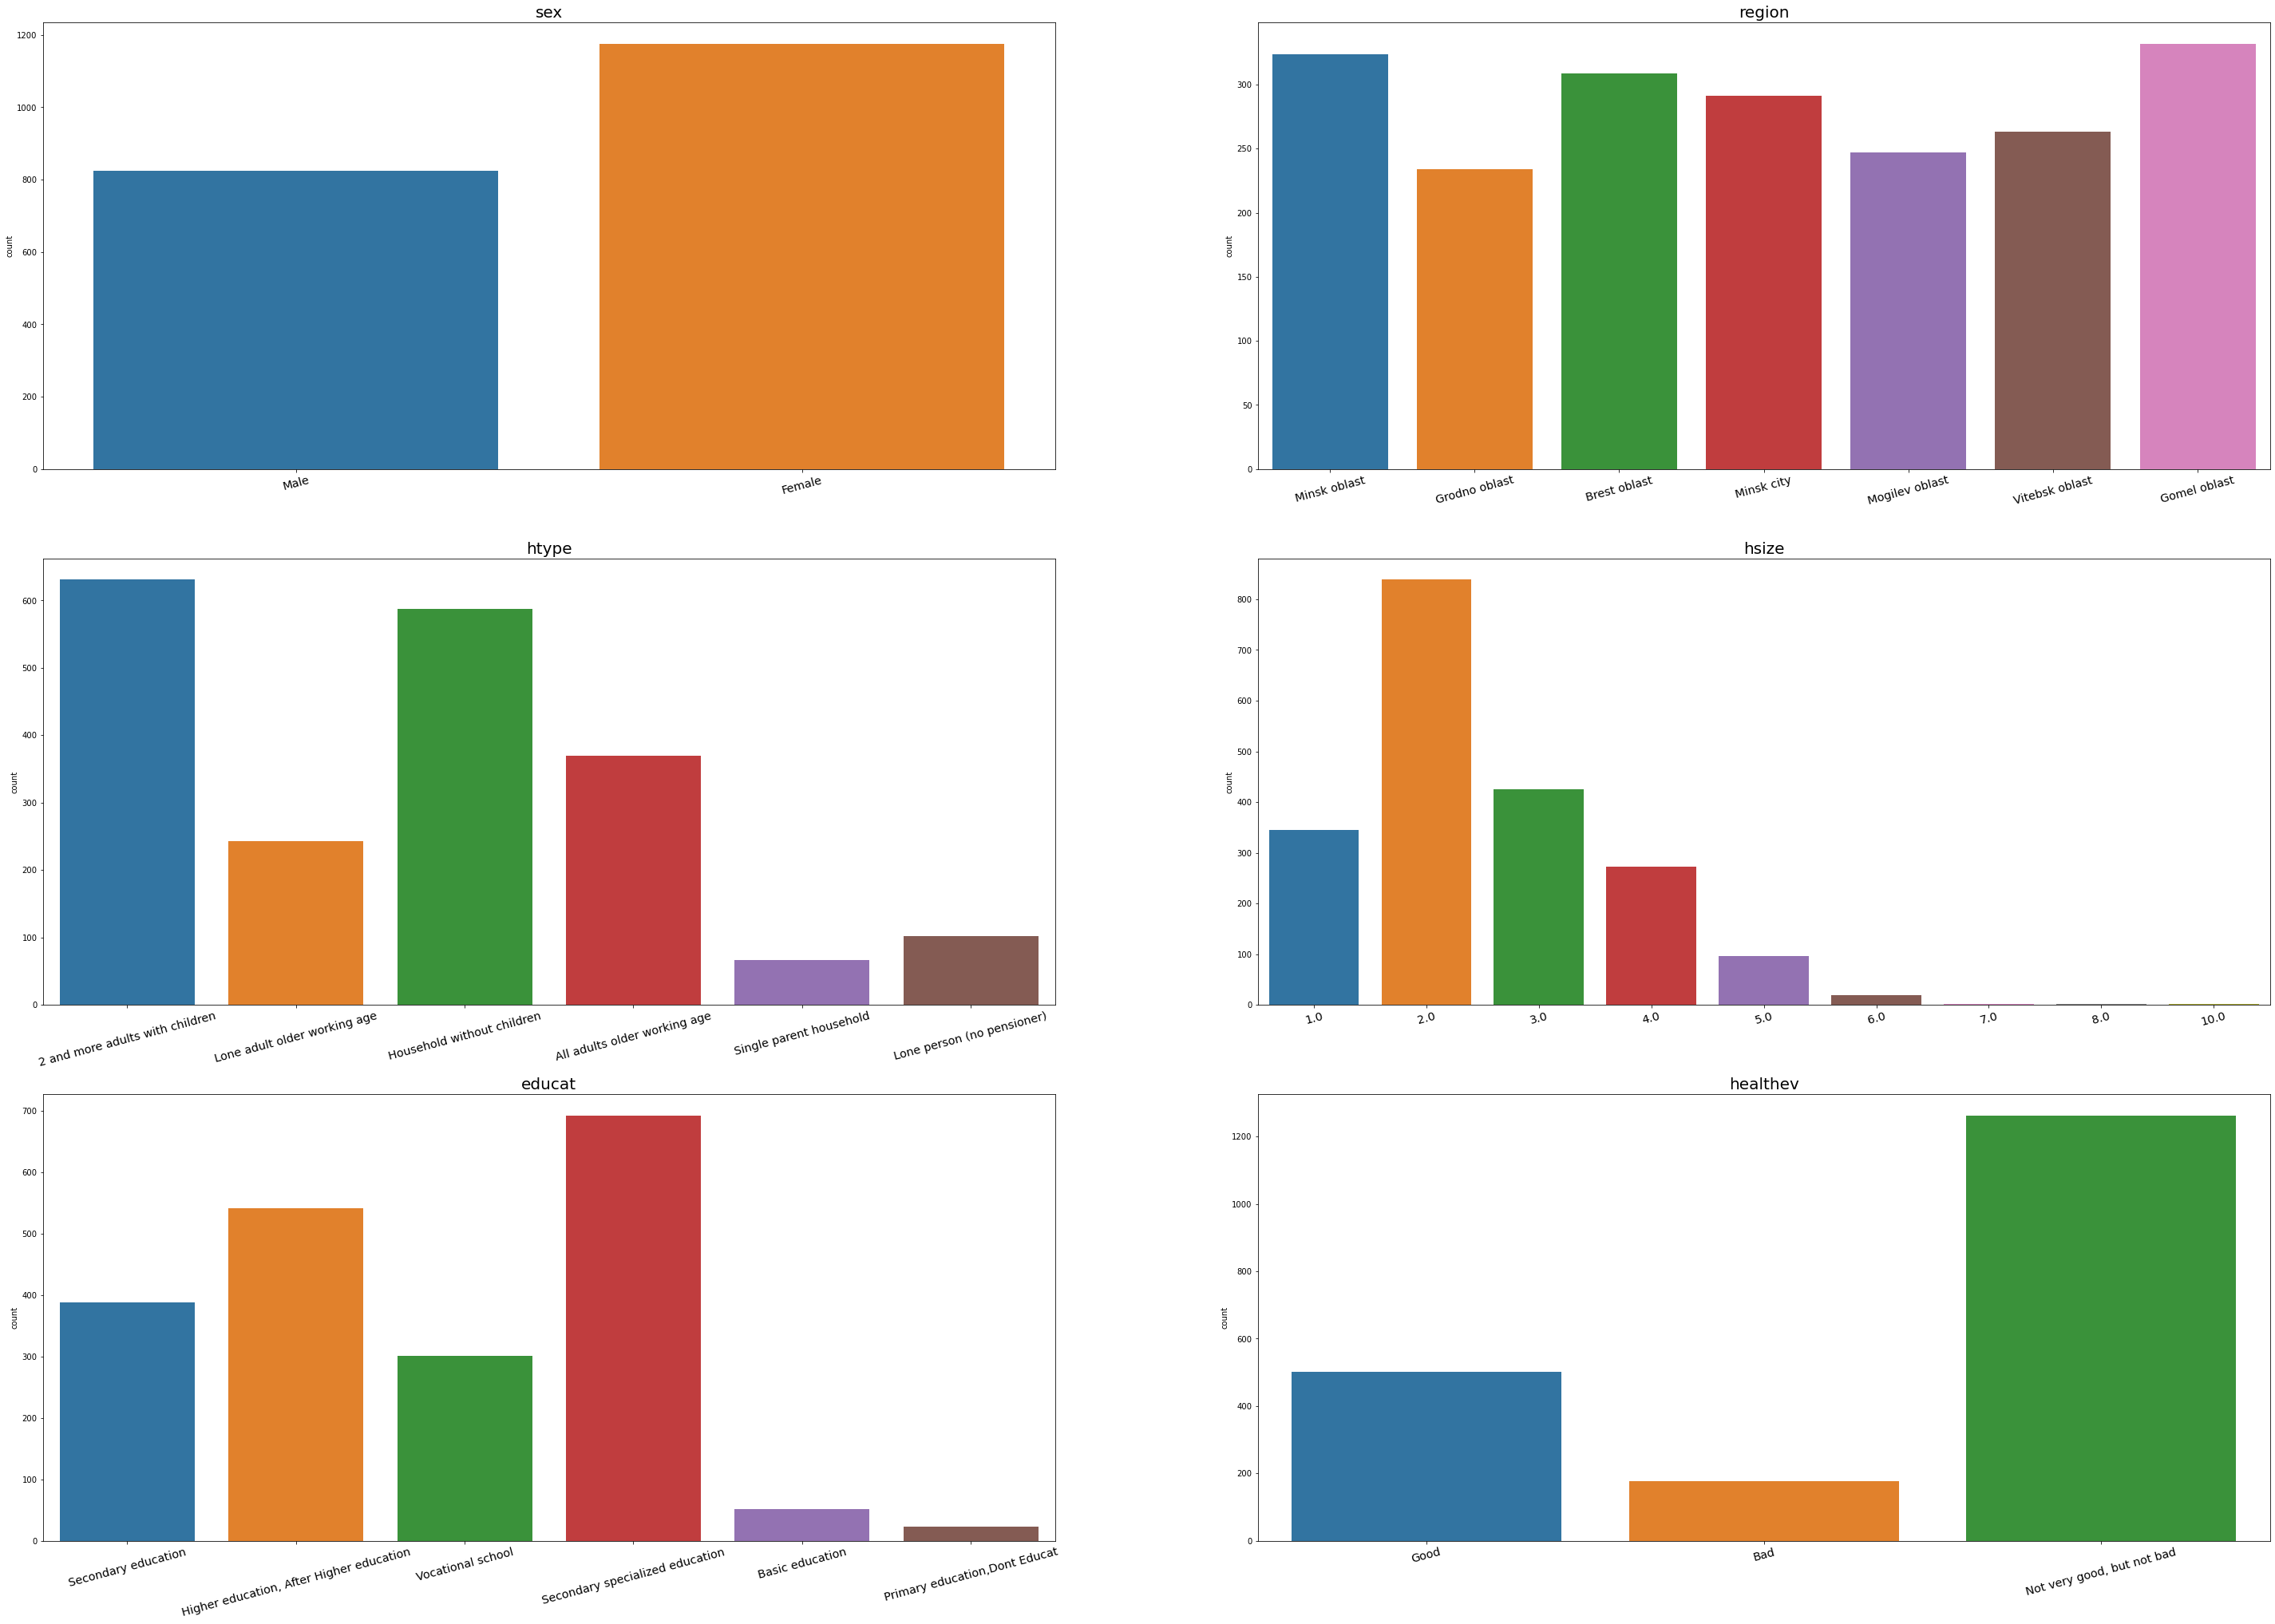

In [11]:
cols_to_plot = ["sex", "region", "htype", "hsize", "educat", "healthev"]
fig, axes = plt.subplots(3, 2, figsize=(50, 35))
axes = axes.reshape(-1)
for i in range(len(cols_to_plot)):
    col = cols_to_plot[i]
    sns.countplot(df[~df[col].isna()][col], ax=axes[i]).set_title(col, fontsize=20)
    plt.setp(axes[i].get_xticklabels(), rotation=15, fontsize='x-large')
    axes[i].set_xlabel(None)
    
print("–ù–µ–≤–∑–≤–µ—à–µ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞:")

–í–∑–≤–µ—à–µ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞:


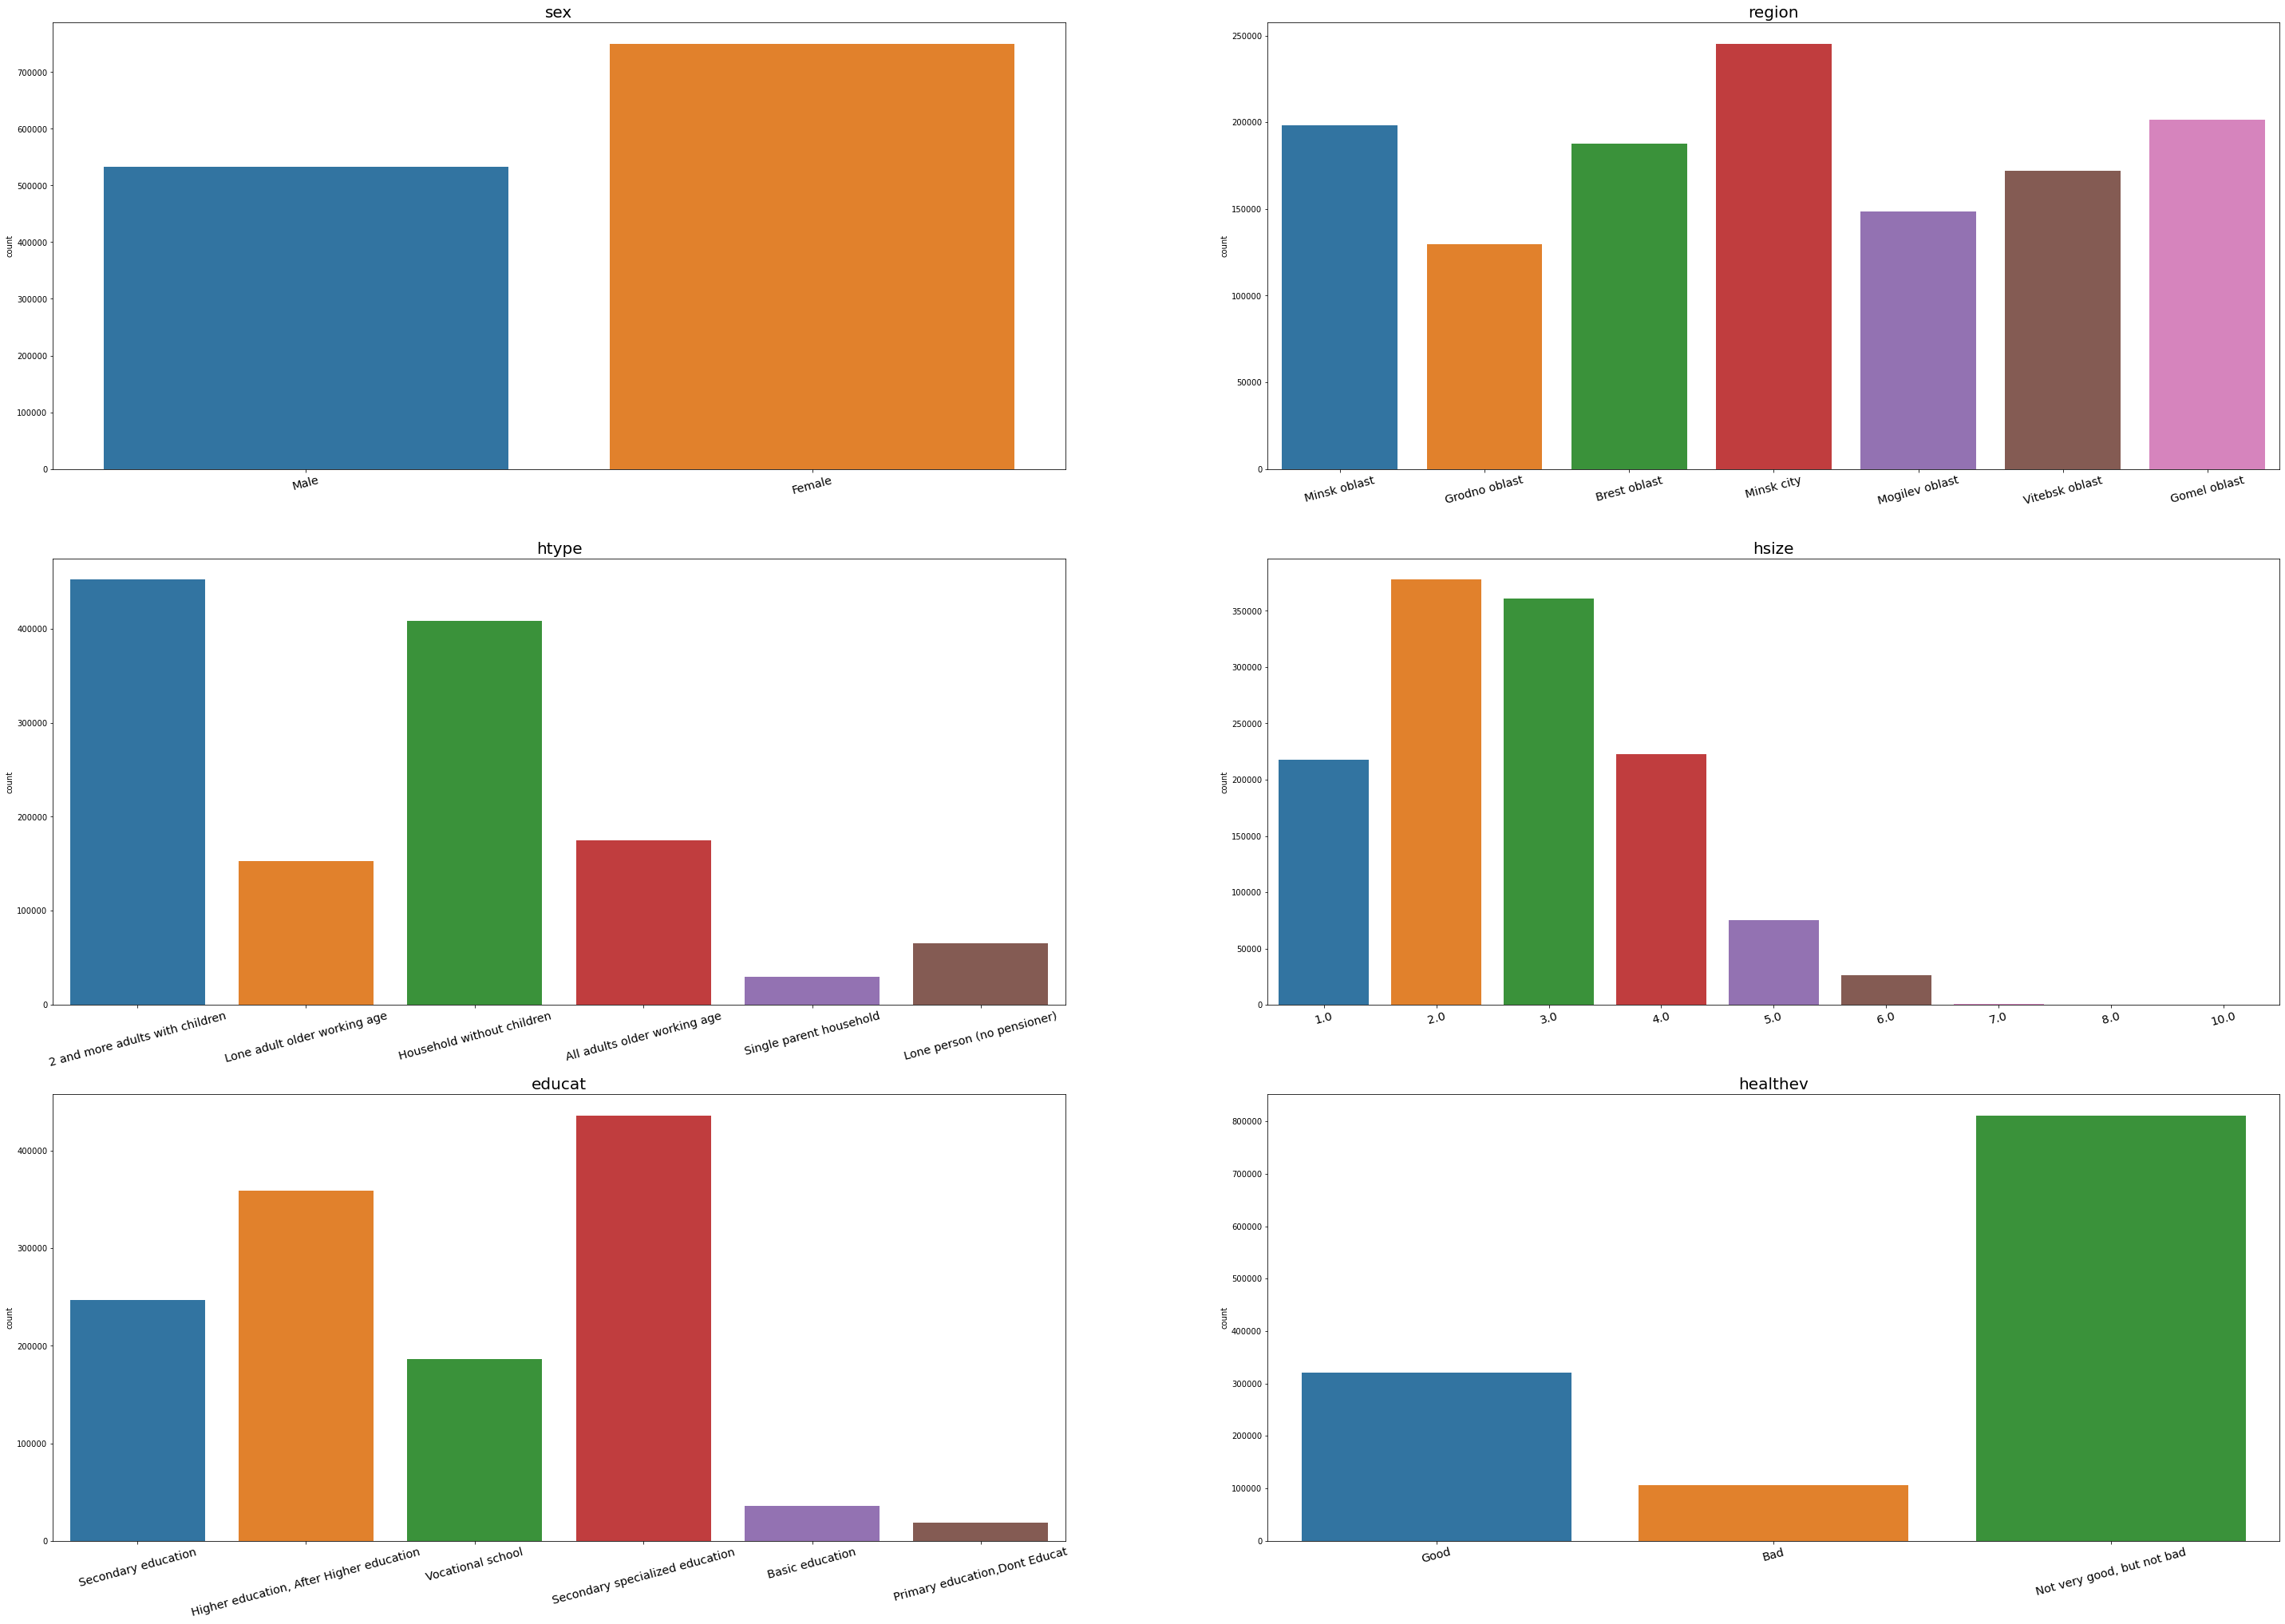

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(50, 35))
axes = axes.reshape(-1)
for i in range(len(cols_to_plot)):
    col = cols_to_plot[i]
    sns.countplot(weighted_df[~weighted_df[col].isna()][col], ax=axes[i]).set_title(col, fontsize=20)
    plt.setp(axes[i].get_xticklabels(), rotation=15, fontsize='x-large')
    axes[i].set_xlabel(None)
    
print("–í–∑–≤–µ—à–µ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞:")

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∑–∞—Ä–ø–ª–∞—Ç (ppinc_1) –∏ —Å–±–µ—Ä–µ–∂–µ–Ω–∏–π (savings) –Ω–µ —Å–∏–ª—å–Ω–æ –º–µ–Ω—è—é—Ç—Å—è –¥–ª—è –≤–∑–≤–µ—à–µ–Ω–Ω–æ–π –∏ –Ω–µ–≤–∑–≤–µ—à–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ä–µ–ø—Ä–µ–∑–µ–Ω—Ç–∞—Ç–∏–≤–Ω–æ—Å—Ç–∏ –≤—ã–±–æ—Ä–∫–∏ –ø–æ —ç—Ç–∏–º –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º.
–ü–æ—á—Ç–∏ –≤—Å–µ –∑–∞—Ä–ø–ª–∞—Ç—ã –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –ø—Ä–æ–º–µ–∂—É—Ç–∫–µ –æ—Ç 0 –¥–æ 1500 —Ä—É–±–ª–µ–π. –í —Å—Ä–µ–¥–Ω–µ–º –ª—é–¥–∏ "–∂–∏–≤—É—Ç –≤ –Ω–æ–ª—å": –Ω–µ –æ—Ç–∫–ª–∞–¥—ã–≤–∞—é—Ç –∏ –Ω–µ —É—Ö–æ–¥—è—Ç –≤ –º–∏–Ω—É—Å—ã, —É –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ –Ω–µ –ø–æ–ª—É—á–∞–µ—Ç—Å—è –æ—Ç–∫–ª–∞–¥—ã–≤–∞—Ç—å –±–æ–ª—å—à–µ 500 —Ä—É–±–ª–µ–π. –¢—Ä–µ—Ç—å —Å—Ç—Ä–∞–Ω—ã –∂–∏–≤—ë—Ç "–≤ –º–∏–Ω—É—Å"

Text(0.5, 0, '–í–∑–≤–µ—à–µ–Ω–Ω–∞—è savings')

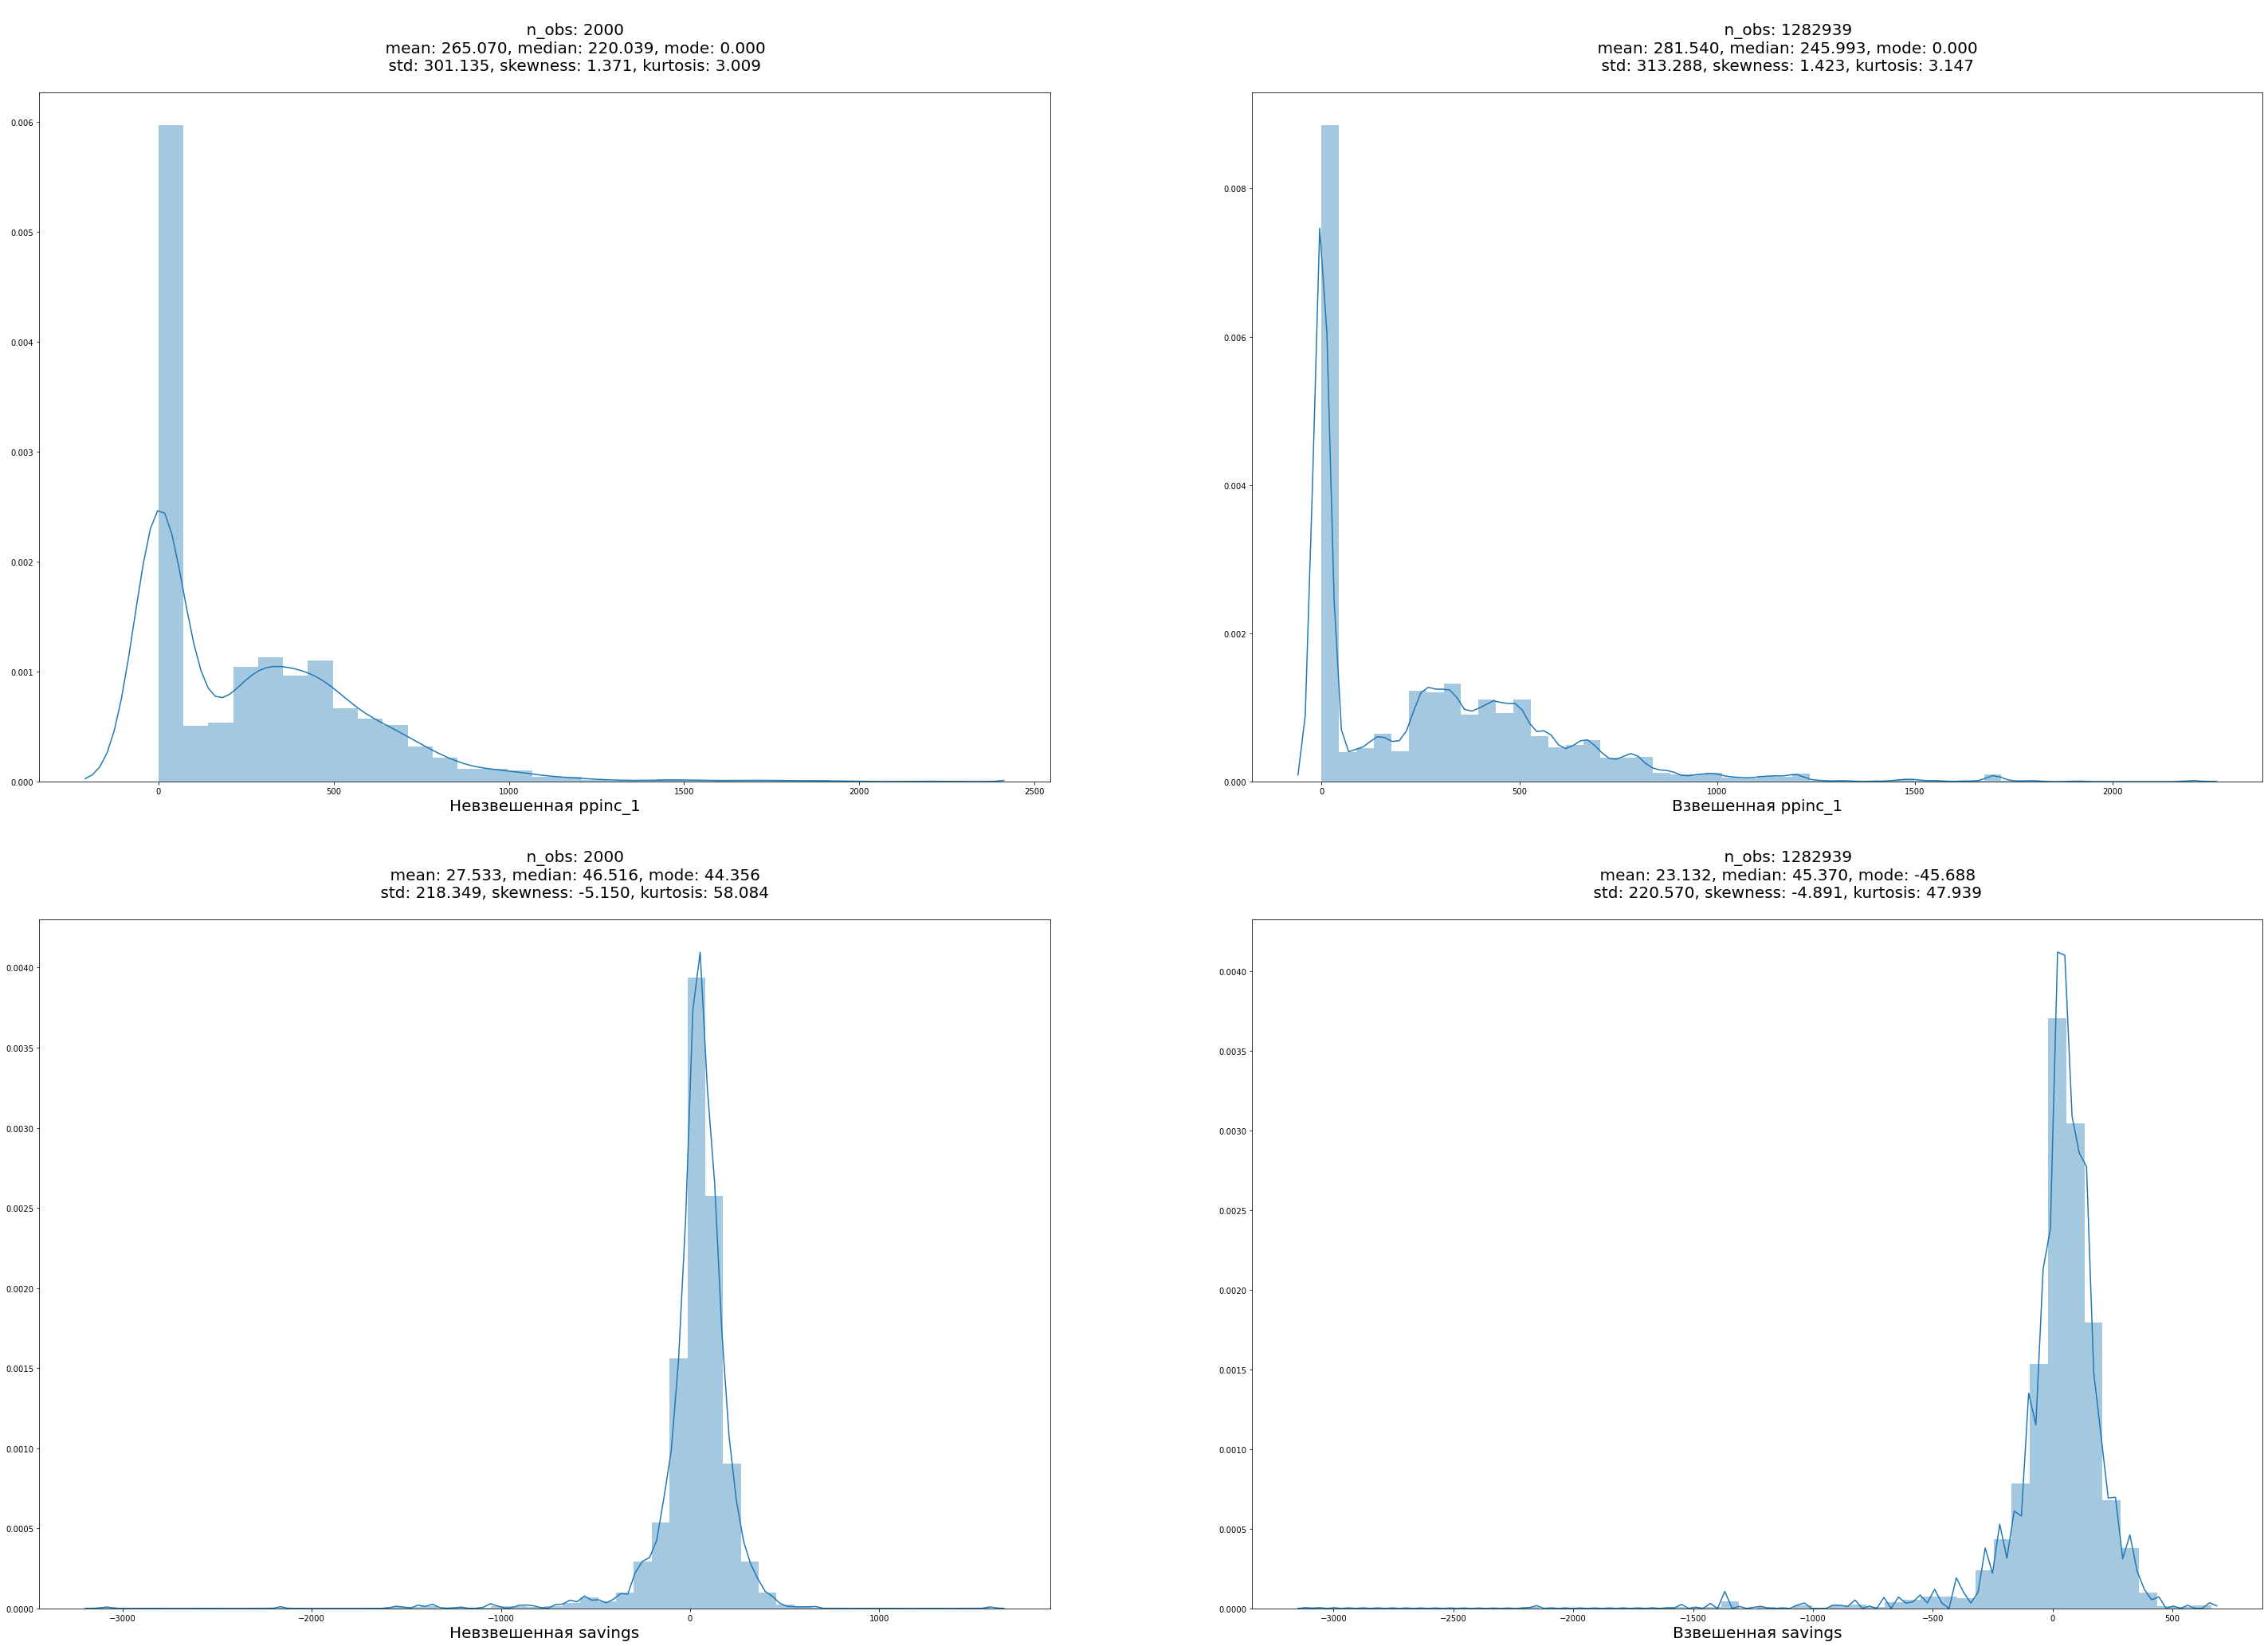

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(50, 35))
axes = axes.reshape(-1)

sns.distplot(df["ppinc_1"], ax=axes[0]).set_title(get_stats(df["ppinc_1"]), fontsize=20)
axes[0].set_xlabel("–ù–µ–≤–∑–≤–µ—à–µ–Ω–Ω–∞—è ppinc_1", fontsize=20)

sns.distplot(weighted_df["ppinc_1"], ax=axes[1]).set_title(get_stats(weighted_df["ppinc_1"]), fontsize=20)
axes[1].set_xlabel("–í–∑–≤–µ—à–µ–Ω–Ω–∞—è ppinc_1", fontsize=20)


sns.distplot(df["savings"], ax=axes[2]).set_title(get_stats(df["savings"]), fontsize=20)
axes[2].set_xlabel("–ù–µ–≤–∑–≤–µ—à–µ–Ω–Ω–∞—è savings", fontsize=20)

sns.distplot(weighted_df["savings"], ax=axes[3]).set_title(get_stats(weighted_df["savings"]), fontsize=20)
axes[3].set_xlabel("–í–∑–≤–µ—à–µ–Ω–Ω–∞—è savings", fontsize=20)

# 3. –ê–Ω–∞–ª–∏–∑ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö

–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–µ–ª–∞–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ totalinc, totalexp –Ω–∞–º–Ω–æ–≥–æ –±–ª–∏–∂–µ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É
–ü—Ä–∏–∑–Ω–∞–∫–∏ inc_4/totalinc (–¥–ª—è –Ω–µ–Ω—É–ª–µ–≤—ã—Ö inc_4) –∏ exp_4/totalexp (–¥–ª—è –Ω–µ–Ω—É–ª–µ–≤—ã—Ö exp_4) –Ω–µ —è–≤–ª—è—é—Ç—Å—è –ª–æ–≥-–Ω–æ—Ä–º–∞–ª—å–Ω—ã–º–∏, –ø–æ—ç—Ç–æ–º—É –¥–∞–Ω–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –Ω–µ –ø–æ–º–æ–≥–ª–æ
–ü—Ä–∏–∑–Ω–∞–∫–∏ weight, height –∏ bmi –∏ —Ç–∞–∫ –±—ã–ª–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–º–∏, —Ç–∞–∫ —á—Ç–æ —ç—Ç–æ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∏–º –Ω–µ –Ω—É–∂–Ω–æ

–°—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è (–ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –Ω—É–ª–µ–≤–æ–º—É —Å—Ä–µ–¥–Ω–µ–º—É –∏ –µ–¥–∏–Ω–∏—á–Ω–æ–π –¥–∏—Å–ø–µ—Ä—Å–∏–∏) –Ω–µ –∏–∑–º–µ–Ω–∏–ª–∞ —Ñ–æ—Ä–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö, –∞ —Ç–æ–ª—å–∫–æ –∏—Ö –º–∞—Å—à—Ç–∞–±.

Text(0.5, 0, 'standardize(exp_4 —á–∞—Å—Ç—å)')

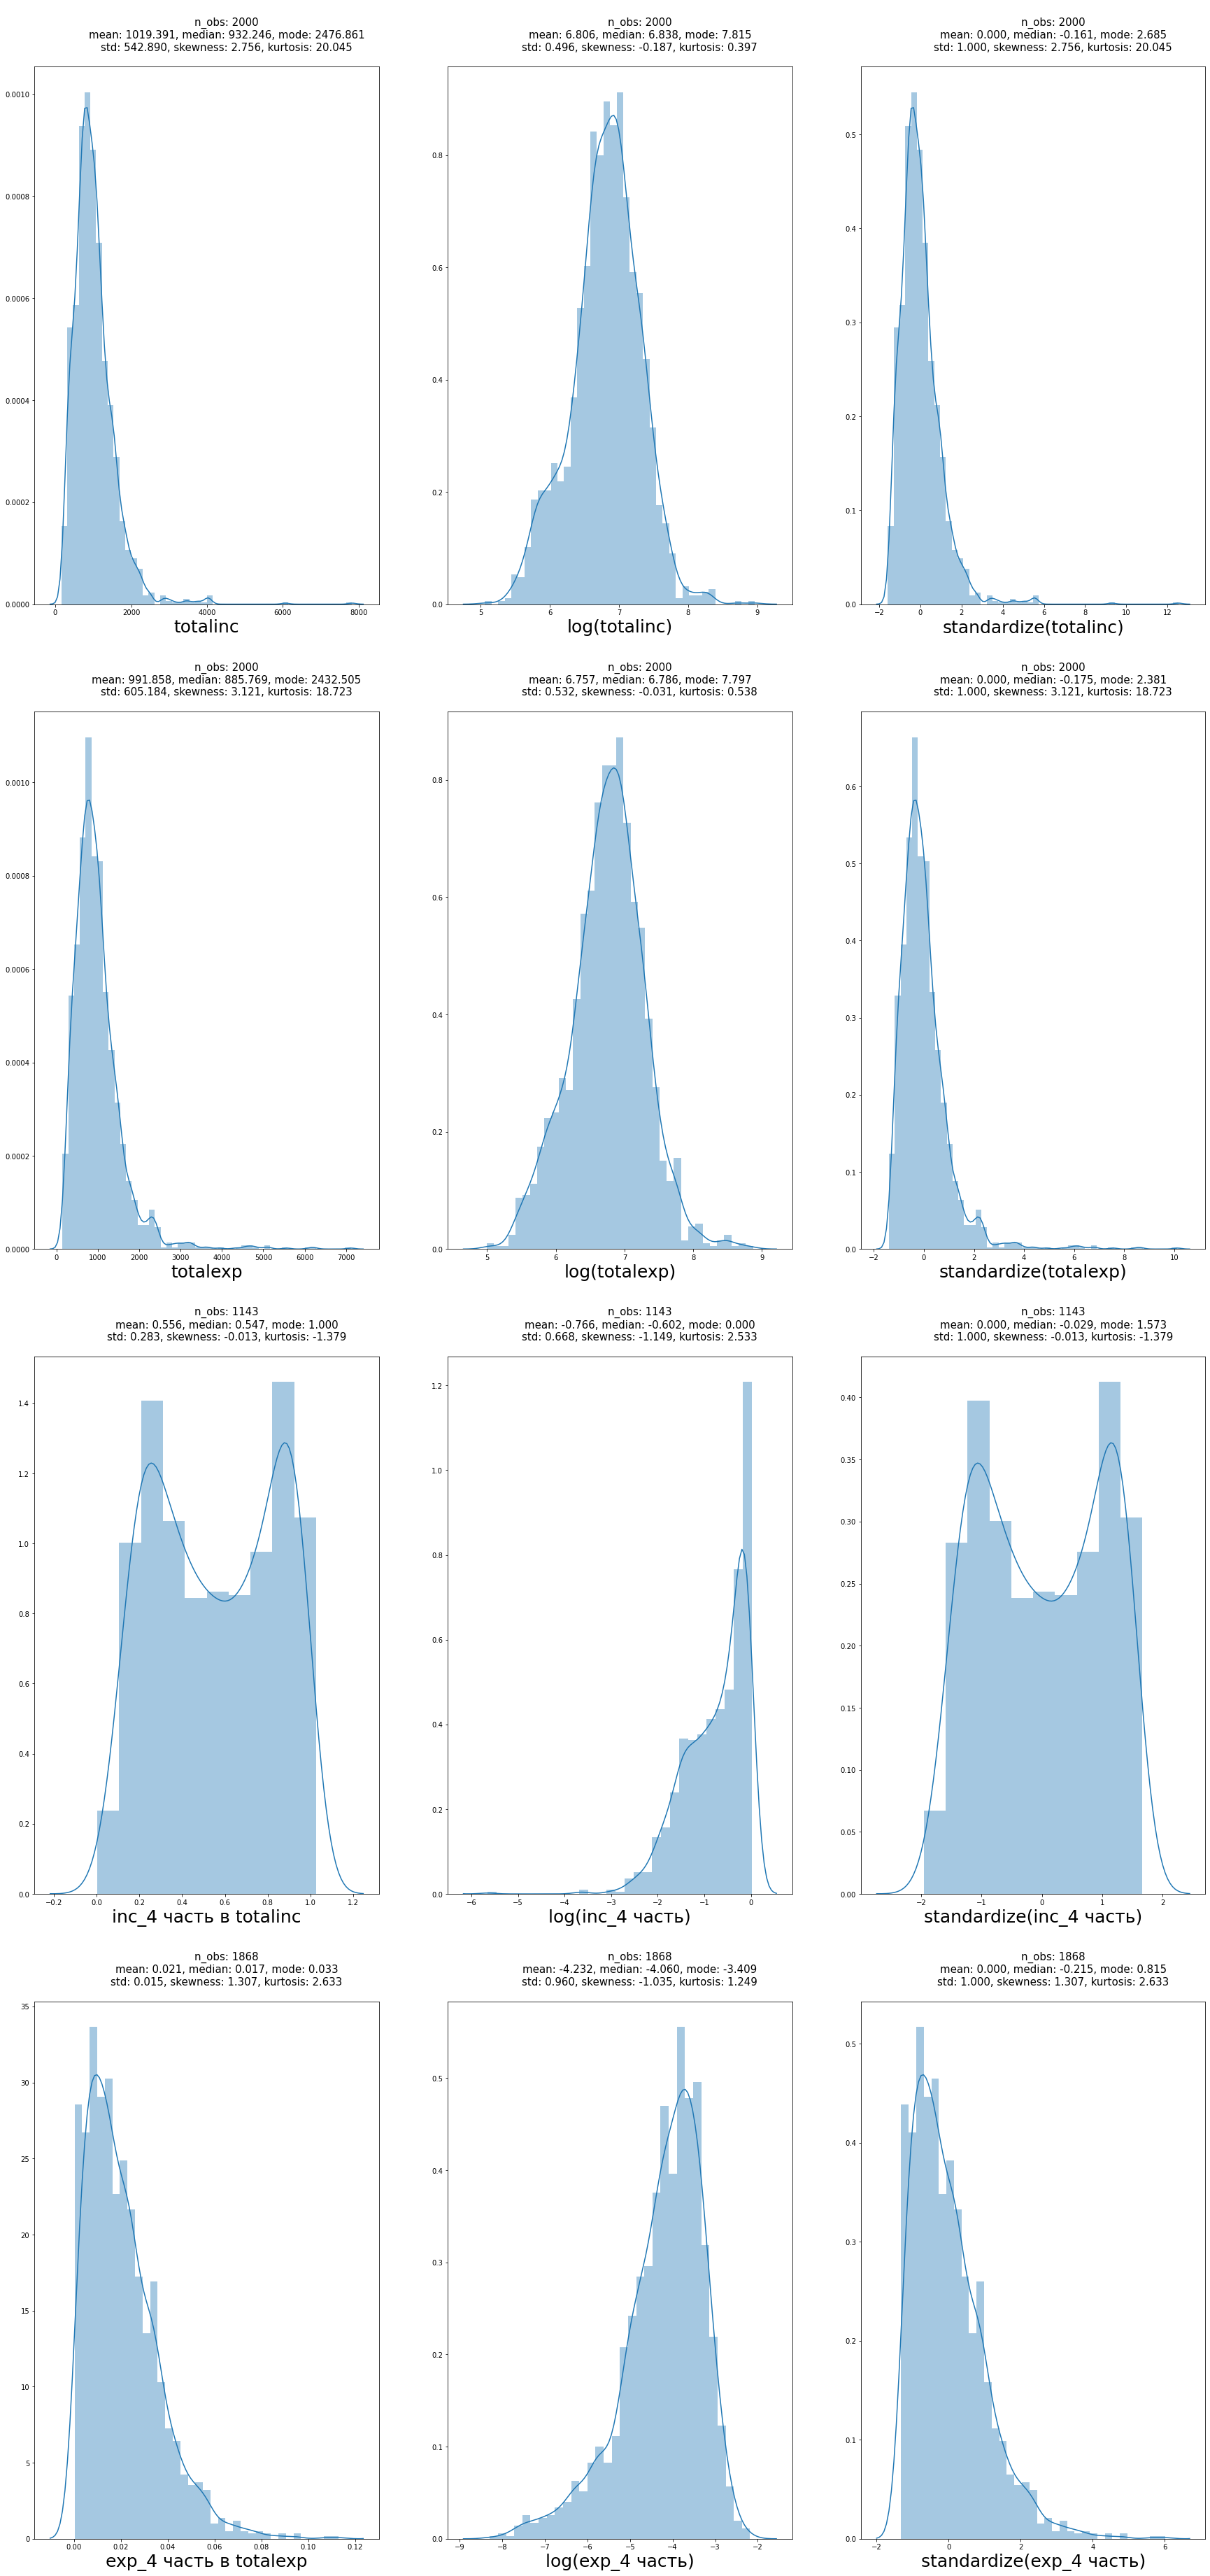

In [15]:
fig, axes = plt.subplots(4, 3, figsize=(30, 65))

sns.distplot(df["totalinc"], ax=axes[0][0]).set_title(
    get_stats(df["totalinc"]), fontsize=15
)
axes[0][0].set_xlabel("totalinc", fontsize=25)
    
log_totalinc = np.log(df["totalinc"])
sns.distplot(log_totalinc, ax=axes[0][1]).set_title(
    get_stats(log_totalinc), fontsize=15
)
axes[0][1].set_xlabel(f"log(totalinc)", fontsize=25)

standard_totalinc = standardize(df["totalinc"])
sns.distplot(standard_totalinc, ax=axes[0][2]).set_title(
    get_stats(standard_totalinc), fontsize=15
)
axes[0][2].set_xlabel(f"standardize(totalinc)", fontsize=25)

sns.distplot(df["totalexp"], ax=axes[1][0]).set_title(
    get_stats(df["totalexp"]), fontsize=15
)
axes[1][0].set_xlabel("totalexp", fontsize=25)
    
log_totalexp = np.log(df["totalexp"])
sns.distplot(log_totalexp, ax=axes[1][1]).set_title(
    get_stats(log_totalexp), fontsize=15
)
axes[1][1].set_xlabel(f"log(totalexp)", fontsize=25)

standard_totalexp = standardize(df["totalexp"])
sns.distplot(standard_totalexp, ax=axes[1][2]).set_title(
    get_stats(standard_totalexp), fontsize=15
)
axes[1][2].set_xlabel(f"standardize(totalexp)", fontsize=25)

sns.distplot(nonzero_inc4_fraction, ax=axes[2][0]).set_title(
    get_stats(nonzero_inc4_fraction), fontsize=15
)
axes[2][0].set_xlabel(f"inc_4 —á–∞—Å—Ç—å –≤ totalinc", fontsize=25)

sns.distplot(np.log(nonzero_inc4_fraction), ax=axes[2][1]).set_title(
    get_stats(np.log(nonzero_inc4_fraction)), fontsize=15
)
axes[2][1].set_xlabel(f"log(inc_4 —á–∞—Å—Ç—å)", fontsize=25)

sns.distplot(standardize(nonzero_inc4_fraction), ax=axes[2][2]).set_title(
    get_stats(standardize(nonzero_inc4_fraction)), fontsize=15
)
axes[2][2].set_xlabel(f"standardize(inc_4 —á–∞—Å—Ç—å)", fontsize=25)

sns.distplot(nonzero_exp4_fraction, ax=axes[3][0]).set_title(
    get_stats(nonzero_exp4_fraction), fontsize=15
)
axes[3][0].set_xlabel(f"exp_4 —á–∞—Å—Ç—å –≤ totalexp", fontsize=25)

sns.distplot(np.log(nonzero_exp4_fraction), ax=axes[3][1]).set_title(
    get_stats(np.log(nonzero_exp4_fraction)), fontsize=15
)
axes[3][1].set_xlabel(f"log(exp_4 —á–∞—Å—Ç—å)", fontsize=25)

sns.distplot(standardize(nonzero_exp4_fraction), ax=axes[3][2]).set_title(
    get_stats(standardize(nonzero_exp4_fraction)), fontsize=15
)
axes[3][2].set_xlabel(f"standardize(exp_4 —á–∞—Å—Ç—å)", fontsize=25)